This notebook serves as a computational and visualization support for the Quantitative Economics course taught by Professor Christian Brinch at BI Norwegian Business School.

Contributors to this work include Anastasia Reich, Viktor Igesund, Elea Bock, and Denis Mørken.

We simulated different market structures to analyse this shift between monopoly, duopoly, and oligopoly. The table below summarises key economic assumptions used in our simulations across different market structures, including high fixed costs, constant marginal costs, and homogeneous products:

### 📌 Assumptions and Demand Function Derivation

This section outlines the key assumptions, formulas, and data inputs used in the model.

---

### **Demand Function Assumption**

We use a linear demand function:

\[
P(Q) = a - bQ
\]

Where:  
- **P** = Price per seat (NOK)  
- **Q** = Quantity of passengers (seats sold)  
- **a** = Choke price (maximum price at zero demand)  
- **b** = Slope of the demand curve (price sensitivity)

---

### **Historical Data**

Data from Hammerfest Airport for 2016–2017, capturing FlyViking’s market entry:

| Year | Passengers | Estimated Avg. Price (NOK) |
|------|------------|----------------------------|
| 2016 | 172,441    | 1399                       |
| 2017 | 194,283    | 1049                       |

*Passenger volume sourced from Hammerfest Airport – SNL. Prices are estimated due to lack of official fare data.*

---

### 📊 Calculations

**Step 1: Slope (b)**  
\[
b = \frac{1399 - 1049}{194283 - 172441} = \frac{350}{21842} \approx 0.016
\]

**Step 2: Intercept (a)**  
\[
a = 1399 + 0.016 \times 172441 = 4158.06
\]

---

### ✅ Final Demand Function

\[
Q(P) = \frac{4158.06 - P}{0.016}
\]

This equation is used throughout the project to simulate price–quantity behavior under different market structures such as monopoly and duopoly.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sympy import symbols, Eq, solve
from scipy.integrate import quad
import seaborn as sns

### Importing the data, defining the global variables and calculations for the dataset

In [220]:
# Import data
df = pd.read_csv('DataQE.csv', delimiter=';')

df.head()

,Market,Seat Demand(Q),Price (P),Fixed Costs (FC),Marginal Cost (MC),Revenue,Variable Cost,Profit
0,Monopoly,NaN,1599,85000000,600,NaN,NaN,NaN
1,Duopoly,NaN,1349,170000000,600,NaN,NaN,NaN
2,Oligopoly,NaN,1100,255000000,600,NaN,NaN,NaN


### Deriving the Demand Function
To build a dynamic and realistic model of demand, we use the **linear demand function**:

```
P(Q) = a - bQ
```

Where:
- **P** = Price per seat (NOK)
- **Q** = Quantity of passengers (seats sold)
- **a** = Intercept (choke price: the price at which demand becomes zero)
- **b** = Slope of the demand curve (how sensitive price is to changes in quantity)

To determine the slope (**b**) and intercept (**a**), we use **historical passenger data from Hammerfest Airport** for the years **2016 and 2017**. These years are especially relevant because **FlyViking entered the market in 2017** (March 2017 – January 2018), leading to observable changes in price and quantity.

### Data Table (Estimated):

| Year | Passengers | Estimated Avg. Price (NOK) |
|------|------------|-----------------------------|
| 2016 | 172,441    | 1399                        |
| 2017 | 194,283    | 1049                        |

> Price data is estimated, as detailed public sources for historical prices on this specific route are not available. Passenger volume is sourced from: [Hammerfest Airport - SNL](https://snl.no/Hammerfest_lufthavn_-_Hammerfest)

### Step 1: Calculate the slope (b)

Using the formula:
```
b = (P1 - P2) / (Q2 - Q1)
```
Substitute values:
```
b = (1399 - 1049) / (194283 - 172441)
  = 350 / 21842
  = 0.016
```

### Step 2: Solve for the intercept (a)

Using the rearranged demand function:
```
a = P + bQ
```
Substitute values from 2016:
```
a = 1399 + (0.016 * 172441)
  = 1399 + 2759.056
  = 4158.056
```

### Final Demand Function
We now express the demand as a function of price:

```
Q(P) = (4158.06 - P) / 0.016
```

This equation will be used throughout the project to calculate demand quantities at given price levels, and to simulate how quantity supplied or demanded changes under different market structures (monopoly, duopoly, etc.).





In [221]:
# Defining the slope and intercept of the demand curve from the README file
a = 4158.06
b = 0.016

# As the marginal cost is constant, we can define it as a constant value
marginal_cost = 600

F_high = df.loc[df["Market"].str.strip() == "Monopoly", "Fixed Costs (FC)"].iloc[0] * 1.10 # Increased fixed costs by 10%
c_high = 1000  # Increased marginal cost

In [222]:
"""
Demand, Revenue, and Profit Functions
These functions capture the core relationships.
- demand_price(Q): Returns the market price for a given total quantity Q.
- demand_quantity(P): Returns the total quantity demanded at a given price P.
- profit(Q, mc, F): Calculates profit based on total revenue minus variable and fixed costs.
"""

# Seat Demand as a function of Price
def demand_quantity(P):
    return (a - P) / b

for i in df["Seat Demand(Q)"]:
    demand_quantity(i)

# Price as a function of Seat Demand
def demand_price(Q):
    return a - b * Q

# Revenue
df["Revenue"] = (df["Price (P)"] * df["Seat Demand(Q)"]).round(2)

# Profit function
def profit(Q, mc, F):
    price = demand_price(Q)
    revenue = price * Q
    variable_cost = mc * Q
    return revenue - (variable_cost + F)

# Variable Cost
df["Variable Cost"] = (df["Marginal Cost (MC)"] * df["Seat Demand(Q)"]).round(2)

"""
Marginal Revenue Function
The marginal revenue (MR) function is defined as:
    MR(Q) = a - (b multiplier)*Q
The b multiplier will differ depending on the market structure (e.g., 2b for monopoly in a linear model,
3b for Cournot duopoly, etc.).
"""
def marginal_revenue(Q, b):
    return a - (b) * Q

# Profit
df["Profit"] = (df["Revenue"] - (df["Variable Cost"] + df["Fixed Costs (FC)"])).round(2)

#df.head()

## Monopoly

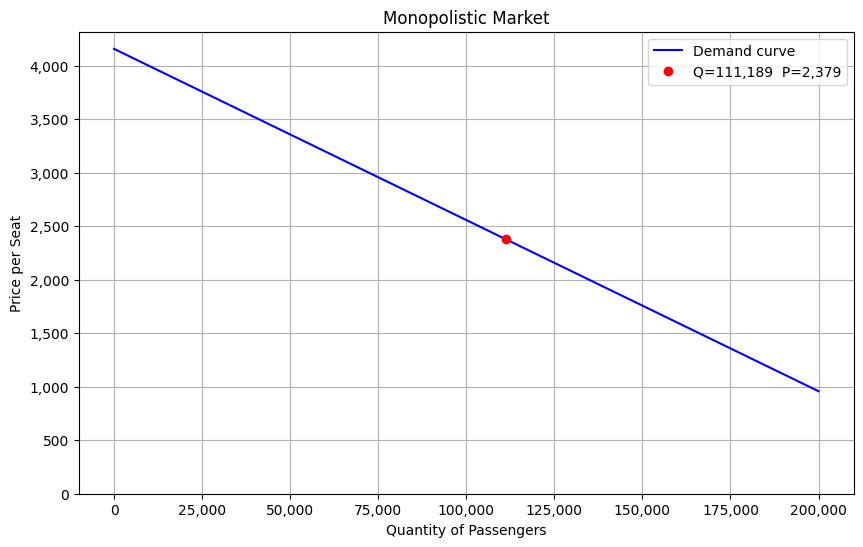

In [223]:
# Creating a plot for the monopolistic demand curve
Q = np.linspace(0,200000,500)
P = a-b*Q

Q_optimal = (a-marginal_cost) / (2 * b)
P_optimal = a - b * Q_optimal

plt.figure(figsize=(10, 6))
plt.plot(Q, P, label="Demand curve", color="b")
plt.plot(Q_optimal, P_optimal, 'ro', label=f'Q={int(Q_optimal):,.0f}  P={int(P_optimal):,.0f}')
plt.title("Monopolistic Market")
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}')) # Format x-axis for thousands delimiter
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}')) # Format y-axis for thousands delimiter
plt.xlabel("Quantity of Passengers")
plt.ylabel("Price per Seat")
plt.grid(True)
plt.legend()
plt.ylim(bottom = 0)
plt.show()

#### using a maximizer

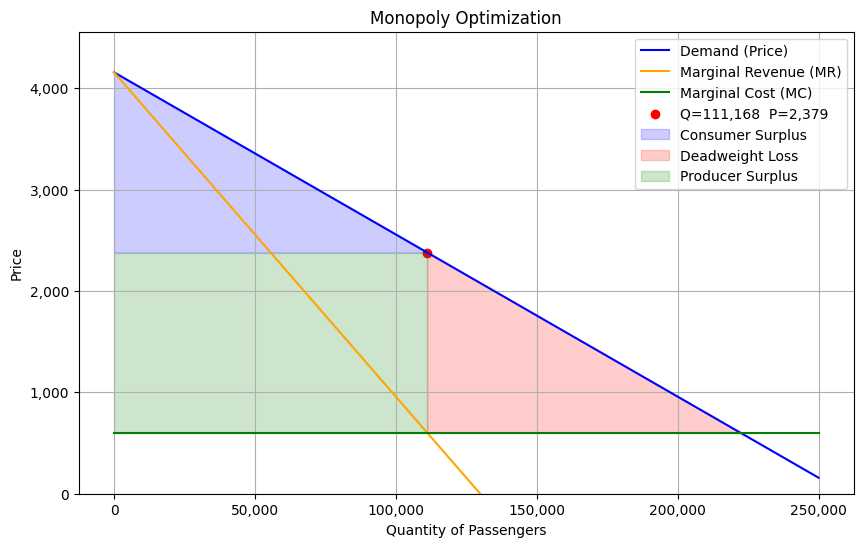

In [224]:
"""
robust_maximizer: Finds the maximum of a single-variable function using an initial grid search
followed by Newton-Raphson iterations. It evaluates the function over a range, picks the best initial guess,
and refines it by approximating the gradient and second derivative until convergence (gradient near zero).
"""
def robust_maximizer(func, start_range, args, points=1000, tol=1e-8, max_iter=1000):
    xs = np.linspace(start_range[0], start_range[1], points)
    ys = np.array([func(x, *args) for x in xs])
    idx = np.argmax(ys)
    current = xs[idx]
    h = 1e-5
    for _ in range(max_iter):
        f_val = func(current, *args)
        grad = (func(current + 0.5*h, *args) - func(current - 0.5*h, *args)) / h
        sec_deriv = (func(current + h, *args) - 2*f_val + func(current - h, *args)) / h**2
        if abs(grad) < tol or sec_deriv == 0:
            break
        current -= grad / sec_deriv
    return current

# Fixed cost is extracted from the dataframe
fixed_cost_monopoly = df.loc[df["Market"] == "Monopoly", "Fixed Costs (FC)"].iloc[0]

optimal_Q = robust_maximizer(profit, (1000, 250000), args=(marginal_cost, fixed_cost_monopoly))
optimal_price = demand_price(optimal_Q)
optimal_profit = profit(optimal_Q, marginal_cost, fixed_cost_monopoly)

Q_social = (a - marginal_cost) / b
P_social = demand_price(Q_social)

quantities = np.linspace(0, 250000, 500)
prices = demand_price(quantities)
MR = marginal_revenue(quantities,b*2)
MC = np.full_like(quantities, marginal_cost)

cs_x = np.linspace(0, optimal_Q, 300)
cs_y1 = demand_price(cs_x)
cs_y2 = np.full_like(cs_x, optimal_price)

ps_y1 = np.full_like(cs_x, marginal_cost)

dwl_x = np.linspace(optimal_Q, Q_social, 200)
dwl_y1 = demand_price(dwl_x)
dwl_y2 = np.full_like(dwl_x, marginal_cost)


plt.figure(figsize=(10,6))
plt.plot(quantities, prices, label='Demand (Price)', color='blue')
plt.plot(quantities, MR, label='Marginal Revenue (MR)', color='orange')
plt.plot(quantities, MC, label='Marginal Cost (MC)', color='green')
plt.scatter(optimal_Q, optimal_price, color='red', label=f'Q={int(optimal_Q):,.0f}  P={int(optimal_price):,.0f}')
plt.xlabel('Quantity of Passengers')
plt.ylabel('Price')
plt.title('Monopoly Optimization')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.fill_between(cs_x, cs_y1, cs_y2, color='blue', alpha=0.2, label='Consumer Surplus')
plt.fill_between(dwl_x, dwl_y1, dwl_y2, color='red', alpha=0.2, label='Deadweight Loss')
plt.fill_between(cs_x, cs_y2, ps_y1, color='green', alpha=0.2, label='Producer Surplus')
plt.legend()
plt.ylim(bottom=0)
plt.grid(True)
plt.show()


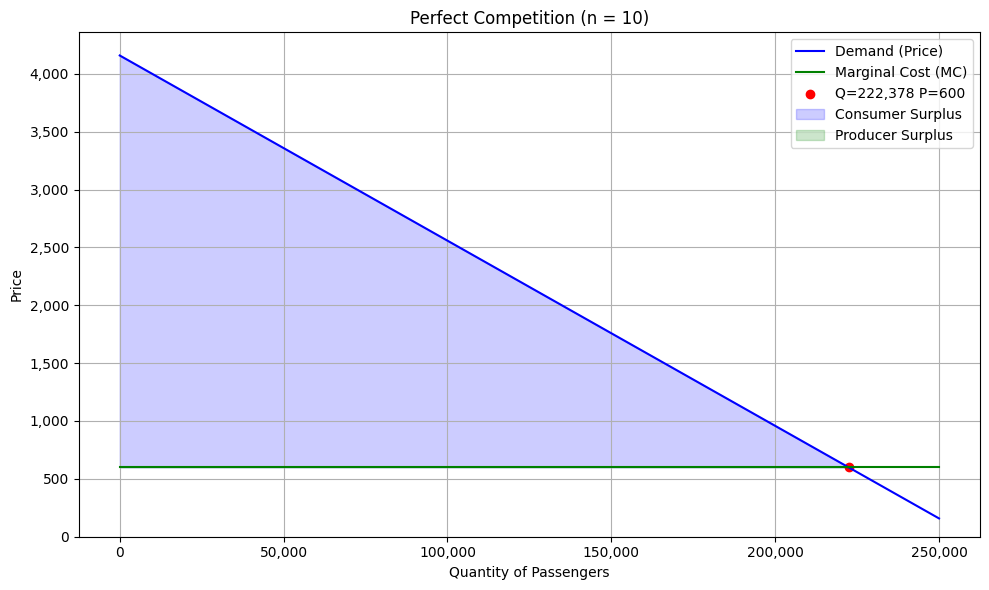

In [225]:
# Perfect competition: price = MC, Q where demand = MC
n_firms = 10
Q_pc = (a - marginal_cost) / b
P_pc = marginal_cost
profit_pc = 0  # zero in perfect competition in long run

quantities = np.linspace(0, 250000, 500)
prices = demand_price(quantities)
MC = np.full_like(quantities, marginal_cost)

cs_x = np.linspace(0, Q_pc, 300)
cs_y1 = demand_price(cs_x)
cs_y2 = np.full_like(cs_x, P_pc)

ps_y1 = np.full_like(cs_x, marginal_cost)  # horizontal line for MC

plt.figure(figsize=(10,6))
plt.plot(quantities, prices, label='Demand (Price)', color='blue')
plt.plot(quantities, MC, label='Marginal Cost (MC)', color='green')
plt.scatter(Q_pc, P_pc, color='red', label=f'Q={int(Q_pc):,.0f} P={int(P_pc):,.0f}')

plt.fill_between(cs_x, cs_y1, cs_y2, color='blue', alpha=0.2, label='Consumer Surplus')
plt.fill_between(cs_x, cs_y2, ps_y1, color='green', alpha=0.2, label='Producer Surplus')

plt.xlabel('Quantity of Passengers')
plt.ylabel('Price')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title(f'Perfect Competition (n = {n_firms})')
plt.legend()
plt.ylim(bottom=0)
plt.grid(True)
plt.tight_layout()
plt.show()


## Duopoly

##### Cournot reaction model with a linear demand curve

$
Q_1^*(Q_2) = \frac{a - c - b\,Q_2}{2b}
$

where:
- \(a\) is the intercept of the demand function,
- \(c\) is the marginal cost,
- \(b\) is the slope of the demand function, and
- \(Q_2\) is the quantity produced by Firm 2.

In [226]:
"""
Duopoly Theory (Cournot Model) and Associated Functions

Duopoly Theory:
In a duopoly (two-firm) setting with linear demand, each firm chooses its quantity simultaneously,
anticipating how the other firm will respond. In the Cournot framework, each firm assumes its rival's
quantity is fixed and then selects the best response to maximize profit. Solving both best response
functions together yields the Cournot-Nash equilibrium. The outcome typically lies between the 
competitive quantity (lower price, higher quantity) and the monopolistic quantity (higher price, 
lower quantity).

Functions for Duopoly:
- wideroe_reaction(q_flyviking):
    Returns Widerøe's best response output given FlyViking's quantity, q_flyviking.
    Formula: Q_i(Q_j) = (a - MC - b * Q_j) / (2 * b)

- flyviking_reaction(q_wideroe):
    Returns FlyViking's best response output given Widerøe's quantity, q_wideroe.
    Formula: Q_j(Q_i) = (a - MC - b * Q_i) / (2 * b)

By simultaneously solving these reaction functions, we obtain the Cournot equilibrium output for
both firms, where neither firm has an incentive to unilaterally deviate from its chosen quantity.
"""

def Wideroe_reaction(qv):
    return(a - marginal_cost-b*qv)/(2*b)

def viking_reaction(qw):
    return(a - marginal_cost-b*qw)/(2*b)

qrange = np.linspace(0,100000,500)

qw_values = Wideroe_reaction(qrange)
qv_values = viking_reaction(qrange)


Nash Equilibrium:

In [227]:
qwn,qvn = symbols('q1 q2')

reactionW = Eq(qwn,Wideroe_reaction(qvn)) # Using the defined reaction function for Wideroe
reactionV= Eq(qvn,viking_reaction(qwn))   # Using the defined reaction function for Viking

nash_solve= solve((reactionW, reactionV), (qwn, qvn))
nash_solution = {str(k): round(float(v), 2) for k, v in nash_solve.items()}
nash_solution

{'q1': 74126.25, 'q2': 74126.25}

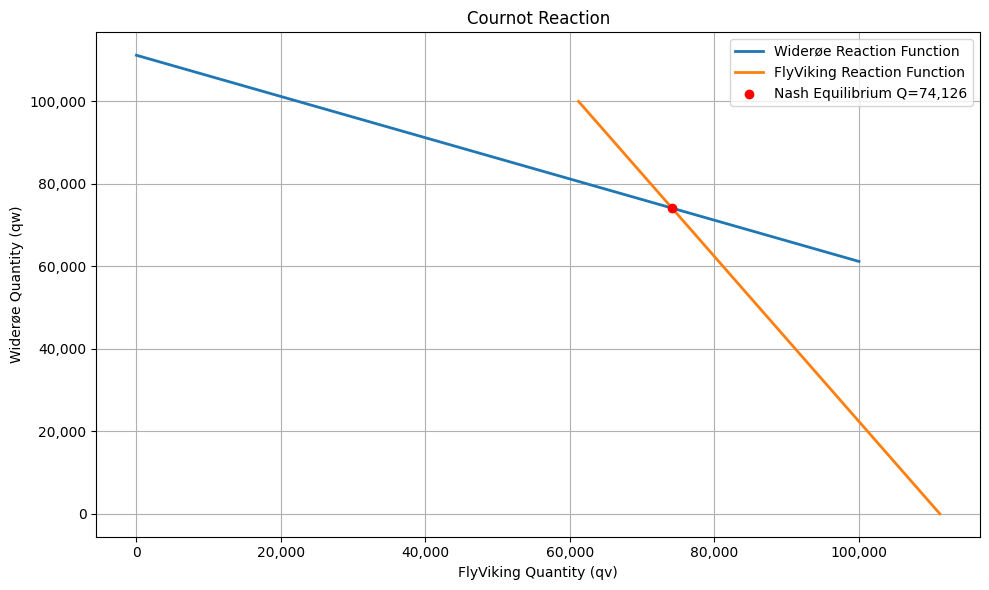

In [228]:
nash_point = (nash_solution['q1'], nash_solution['q2'])

# Plotting the reaction functions and Nash equilibrium
plt.figure(figsize=(10, 6))
plt.plot(qrange, qw_values, label="Widerøe Reaction Function", linewidth=2)
plt.plot(qv_values, qrange, label="FlyViking Reaction Function", linewidth=2)
plt.scatter(nash_point[0], nash_point[1], color='red', zorder=5, label=f"Nash Equilibrium Q={int(nash_point[1]):,.0f}" )
plt.xlabel("FlyViking Quantity (qv)")
plt.ylabel("Widerøe Quantity (qw)")
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Cournot Reaction")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Duopoly price

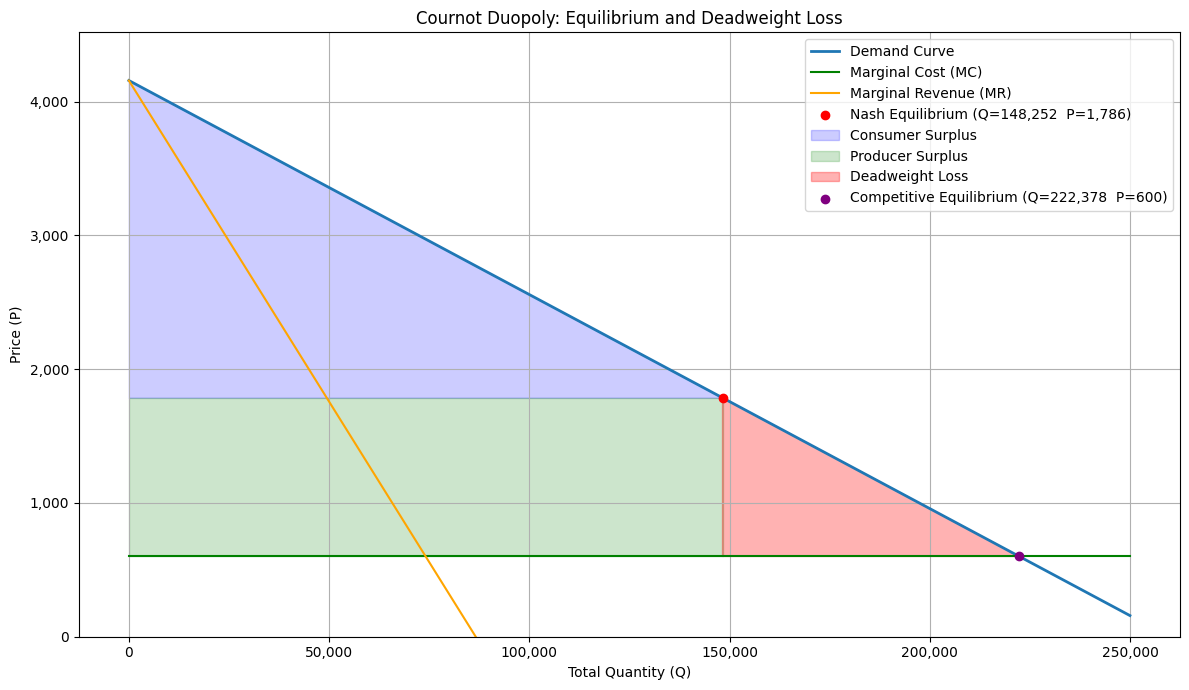

In [229]:
# Nash Equilibrium Quantity (provided/calculated earlier):
Q_eq = nash_point[0] * 2  # Cournot total quantity using the first firm's quantity
P_eq = demand_price(Q_eq)

# Competitive equilibrium: set demand = MC (300)
Q_comp = (a - marginal_cost) / b
P_comp = demand_price(Q_comp)

Q_range = np.linspace(0, 250000, 500)
P_values = demand_price(Q_range)

MC = np.full_like(Q_range, marginal_cost)
q_individual = np.linspace(0, 150000, 500)
MR_values = marginal_revenue(q_individual, b*3) 

# Surplus Areas
cs_x = np.linspace(0, Q_eq, 300)
cs_y1 = demand_price(cs_x)
cs_y2 = np.full_like(cs_x, P_eq)
ps_y1 = np.full_like(cs_x, marginal_cost)

# Deadweight loss area
DWL_x = [Q_eq, Q_comp, Q_eq]
DWL_y = [P_eq, marginal_cost, marginal_cost]

# Plotting the demand, MR, MC, and equilibrium points
plt.figure(figsize=(12, 7))

plt.plot(Q_range, P_values, label="Demand Curve", linewidth=2)
plt.plot(Q_range, MC, label="Marginal Cost (MC)", color="green")
plt.plot(q_individual, MR_values, label="Marginal Revenue (MR)", color="orange")

plt.scatter(Q_eq, P_eq, color='red', zorder=5, 
            label=f"Nash Equilibrium (Q={int(Q_eq):,.0f}  P={P_eq:,.0f})")


plt.fill_between(cs_x, cs_y1, cs_y2, color='blue', alpha=0.2, label='Consumer Surplus')
plt.fill_between(cs_x, cs_y2, ps_y1, color='green', alpha=0.2, label='Producer Surplus')

plt.fill(DWL_x, DWL_y, color='red', alpha=0.3, label='Deadweight Loss')

plt.scatter(Q_comp, P_comp, color='purple', zorder=5, 
            label=f"Competitive Equilibrium (Q={int(Q_comp):,.0f}  P={P_comp:,.0f})")

plt.title("Cournot Duopoly: Equilibrium and Deadweight Loss")
plt.xlabel("Total Quantity (Q)")
plt.ylabel("Price (P)")
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

This model shows how two firms strategically interact in a shared market. Even without colluding, they restrict output, which keeps prices higher than marginal cost. Consumers lose some surplus, and the overall market efficiency is lower than in competitive markets.

But each firm does what's best for itself, given what the other is doing — and that mutual best-response is what we call the Cournot-Nash equilibrium.

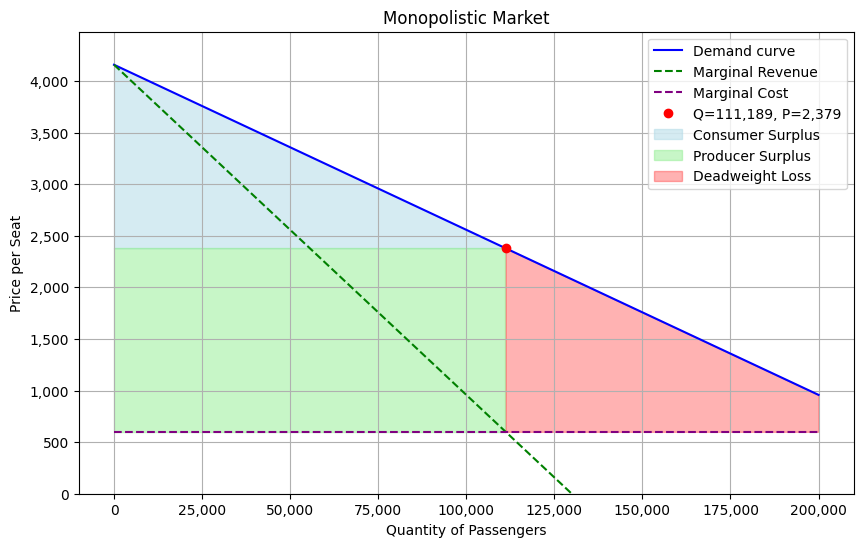

In [230]:
Q = np.linspace(0,200000,500)

P = demand_price(Q)
MR = marginal_revenue(Q, b*2)
MC = np.full_like(Q,marginal_cost)

Q_optimal = (a - marginal_cost) / (2 * b)
P_optimal = a - b * Q_optimal

Q_competitive = (a - marginal_cost) / b
P_competitive = demand_price(Q_competitive)
consumer_surplus = 0.5 * Q_optimal * (a - P_optimal)
producer_surplus = 0.5 * Q_optimal * (P_optimal - marginal_cost)

# Deadweight Loss
dwl_x = np.linspace(Q_optimal, 200000, 200) 
dwl_y1 = demand_price(dwl_x)
dwl_y2 = np.full_like(dwl_x, marginal_cost)

plt.figure(figsize=(10, 6))
plt.plot(Q, P, label="Demand curve", color="b")
plt.plot(Q, MR, label="Marginal Revenue", color="g", linestyle="--")
plt.plot(Q,MC, label = "Marginal Cost",color = "purple",linestyle = "--")
plt.plot(Q_optimal, P_optimal, 'ro', label=f'Q={int(Q_optimal):,.0f}, P={int(P_optimal):,.0f}')
plt.fill_between(Q, P, P_optimal, where=(Q <= Q_optimal), color='lightblue', alpha=0.5, label="Consumer Surplus")
plt.fill_between(Q, MC, P_optimal, where=(Q <= Q_optimal), color='lightgreen', alpha=0.5, label="Producer Surplus")
plt.fill_between(dwl_x, dwl_y1, dwl_y2, color='red', alpha=0.3, label='Deadweight Loss')
plt.title("Monopolistic Market")
plt.xlabel("Quantity of Passengers")
plt.ylabel("Price per Seat")
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.grid(True)
plt.legend()
plt.ylim(bottom = 0)
plt.show()

Models analysing competition between the two airlines Widerøe and FliViking operating in a duopolistic market (Hammerfest airport, 2017). The cournot model shows the firms compete by setting quantity - number of seats. While the market price is determined by the total output through a shared demand curve, as these firms offers identical products. Price decrease while quantity increase as expected from the monopolistic market.

## Most effective number of competitors


perfect competition:

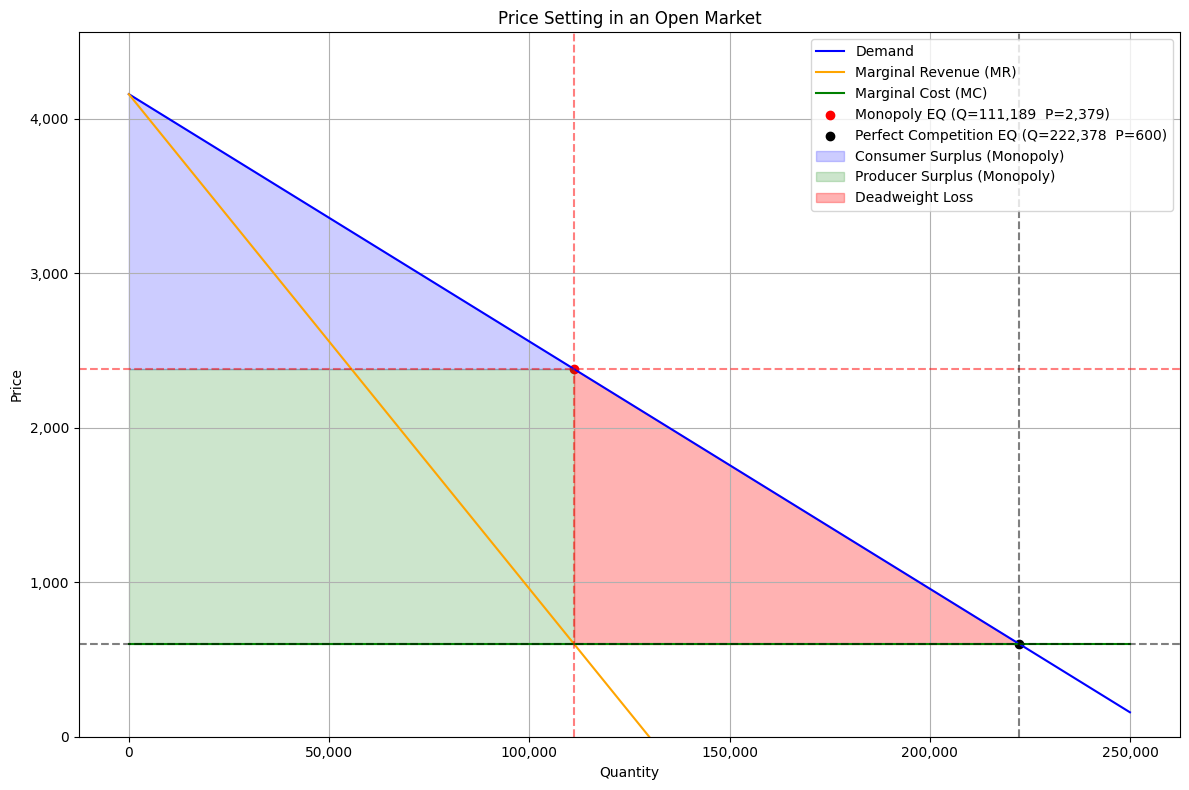

In [231]:
Q = np.linspace(0, 250000, 500)
P = demand_price(Q)
MR = marginal_revenue(Q,b*2)
MC = np.full_like(Q, marginal_cost)

# Calculate the socially optimal output (perfect competition equilibrium) quantity and its price
Q_social = (a - marginal_cost) / b
P_social = demand_price(Q_social)

# Calculate the monopoly equilibrium quantity and price
Q_mono = (a - marginal_cost) / (2 * b)
P_mono = demand_price(Q_mono)


plt.figure(figsize=(12, 8))


plt.plot(Q, P, label="Demand", color="blue")
plt.plot(Q, MR, label="Marginal Revenue (MR)", color="orange")
plt.plot(Q, MC, label="Marginal Cost (MC)", color="green")


plt.scatter(Q_mono, P_mono, color='red', label=f"Monopoly EQ (Q={int(Q_mono):,.0f}  P={int(P_mono):,.0f})")
plt.axvline(Q_mono, color='red', linestyle='--', alpha=0.5)
plt.axhline(P_mono, color='red', linestyle='--', alpha=0.5)

plt.scatter(Q_social, P_social, color='black', label=f"Perfect Competition EQ (Q={int(Q_social):,.0f}  P={int(P_social):,.0f})")
plt.axvline(Q_social, color='black', linestyle='--', alpha=0.5)
plt.axhline(P_social, color='black', linestyle='--', alpha=0.5)

cs_x = np.linspace(0, Q_mono, 300)
cs_y1 = demand_price(cs_x)
cs_y2 = np.full_like(cs_x, P_mono)
plt.fill_between(cs_x, cs_y1, cs_y2, color='blue', alpha=0.2, label='Consumer Surplus (Monopoly)')


ps_y1 = np.full_like(cs_x, marginal_cost)
plt.fill_between(cs_x, cs_y2, ps_y1, color='green', alpha=0.2, label='Producer Surplus (Monopoly)')


dwl_x = np.linspace(Q_mono, Q_social, 200)
dwl_y1 = demand_price(dwl_x)
dwl_y2 = np.full_like(dwl_x, marginal_cost)
plt.fill_between(dwl_x, dwl_y1, dwl_y2, color='red', alpha=0.3, label='Deadweight Loss')

plt.title("Price Setting in an Open Market")
plt.xlabel("Quantity")
plt.ylabel("Price")
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylim(bottom=0)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Oligopolistic Model with n number of players

#### *With 3 firms (n = 3)*

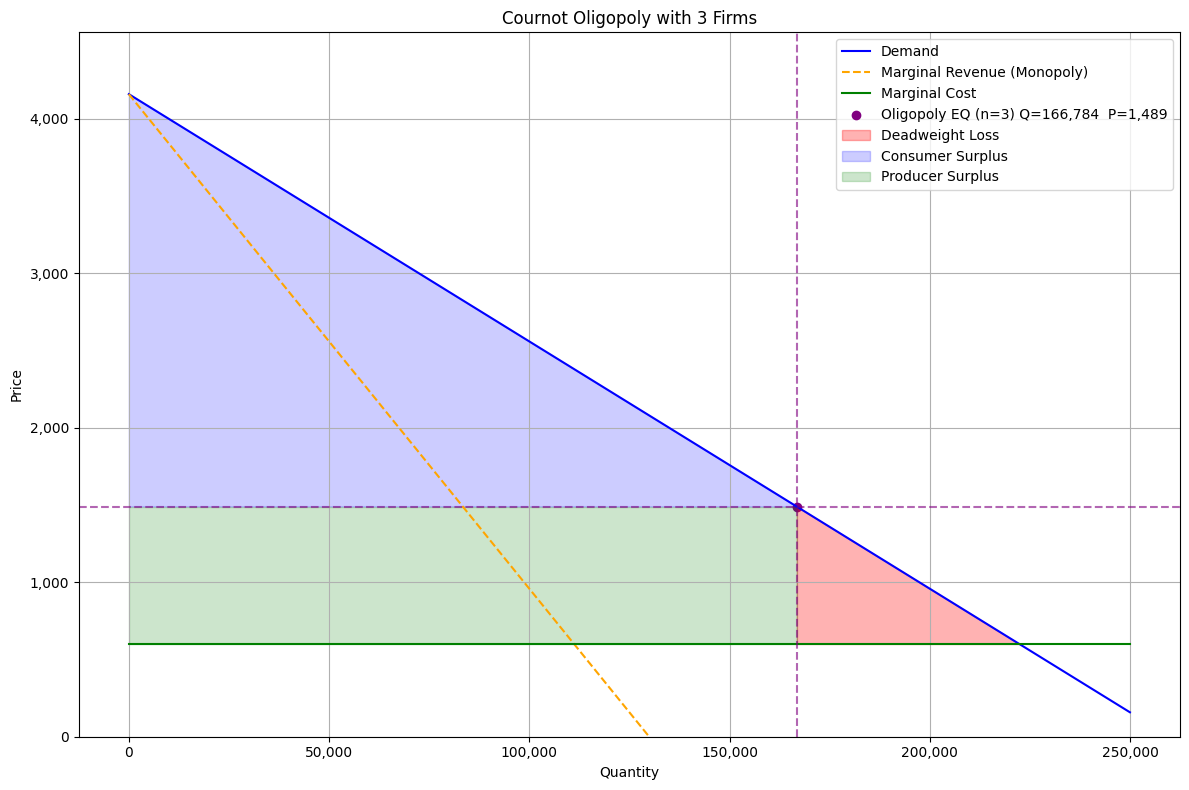

In [232]:
"""
Cournot Oligopoly Model:
For a linear demand P = a - b·Q and constant marginal cost (mc), the symmetric Cournot equilibrium is given by:
    Q_eq = n*(a - mc)/((n+1)*b)    and    P_eq = a - b*Q_eq
"""
def cournot_oligopoly_model(a=a, b=b, mc=marginal_cost, n=2):
    
    Q_eq = n * (a - marginal_cost) / ((n + 1) * b)
    P_eq = demand_price(Q_eq)

    Q_social = (a - marginal_cost) / b
    P_social = marginal_cost

    Q_mono = globals()['Q_mono'] # Using the global variable
    P_mono = demand_price(Q_mono)

    
    Q = np.linspace(0, 250000, 500)
    P = a - b * Q
    MR = a - 2 * b * Q
    MC = np.full_like(Q, mc)

    
    plt.figure(figsize=(12, 8))
    plt.plot(Q, P, label="Demand", color="blue")
    plt.plot(Q, MR, label="Marginal Revenue (Monopoly)", color="orange", linestyle='--')
    plt.plot(Q, MC, label="Marginal Cost", color="green")

    
    plt.scatter(Q_eq, P_eq, color='purple', label=f"Oligopoly EQ (n={n}) Q={int(Q_eq):,.0f}  P={int(P_eq):,.0f}")
    plt.axvline(Q_eq, color='purple', linestyle='--', alpha=0.6)
    plt.axhline(P_eq, color='purple', linestyle='--', alpha=0.6)

   
    dwl_x = np.linspace(Q_eq, Q_social, 200)
    dwl_y1 = a - b * dwl_x
    dwl_y2 = np.full_like(dwl_x, mc)
    plt.fill_between(dwl_x, dwl_y1, dwl_y2, color='red', alpha=0.3, label='Deadweight Loss')

    
    cs_x = np.linspace(0, Q_eq, 300)
    cs_y1 = a - b * cs_x
    cs_y2 = np.full_like(cs_x, P_eq)
    ps_y2 = np.full_like(cs_x, mc)
    plt.fill_between(cs_x, cs_y1, cs_y2, color='blue', alpha=0.2, label='Consumer Surplus')
    plt.fill_between(cs_x, cs_y2, ps_y2, color='green', alpha=0.2, label='Producer Surplus')

    
    plt.title(f"Cournot Oligopoly with {n} Firms")
    plt.xlabel("Quantity")
    plt.ylabel("Price")
    ax = plt.gca()
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    plt.ylim(bottom=0)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

cournot_oligopoly_model(n=3)


#### *With 4 firms (n = 4)*

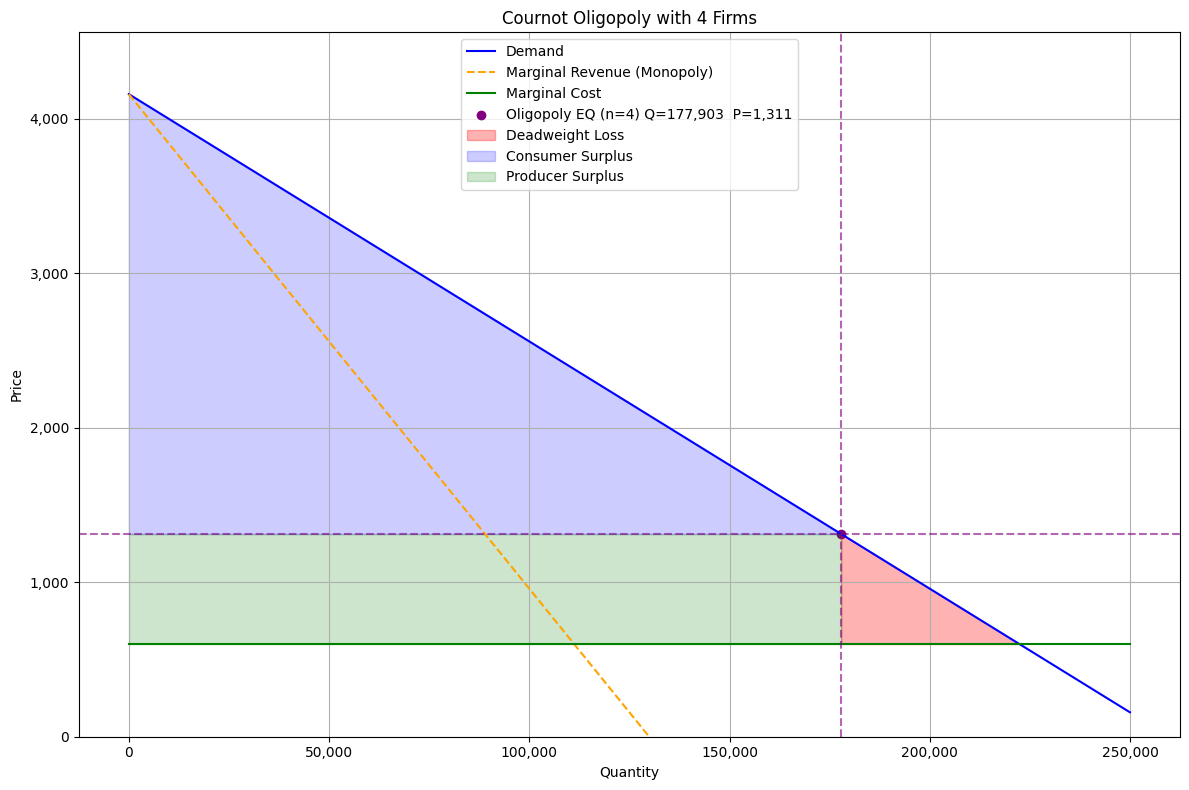

In [233]:
cournot_oligopoly_model(n=4)

#### *With 10 firms (n = 10)*

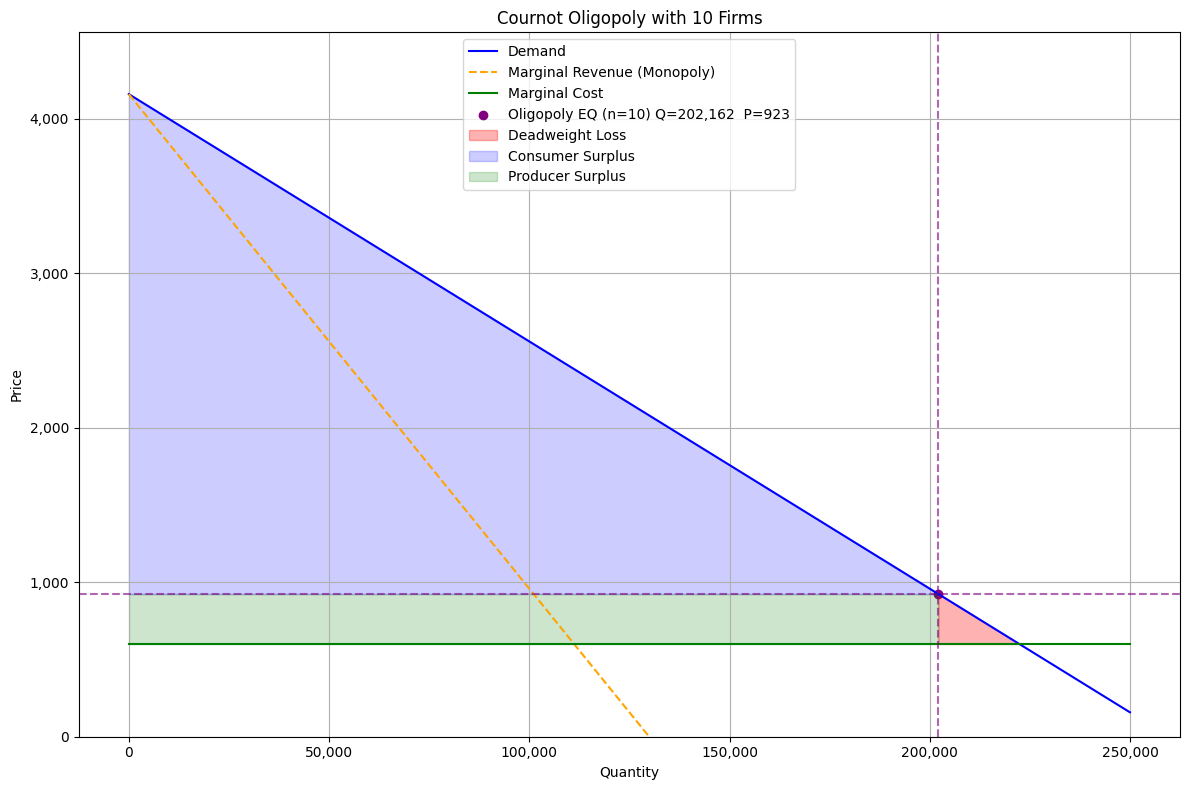

In [234]:
cournot_oligopoly_model(n=10)

### Number of competitors

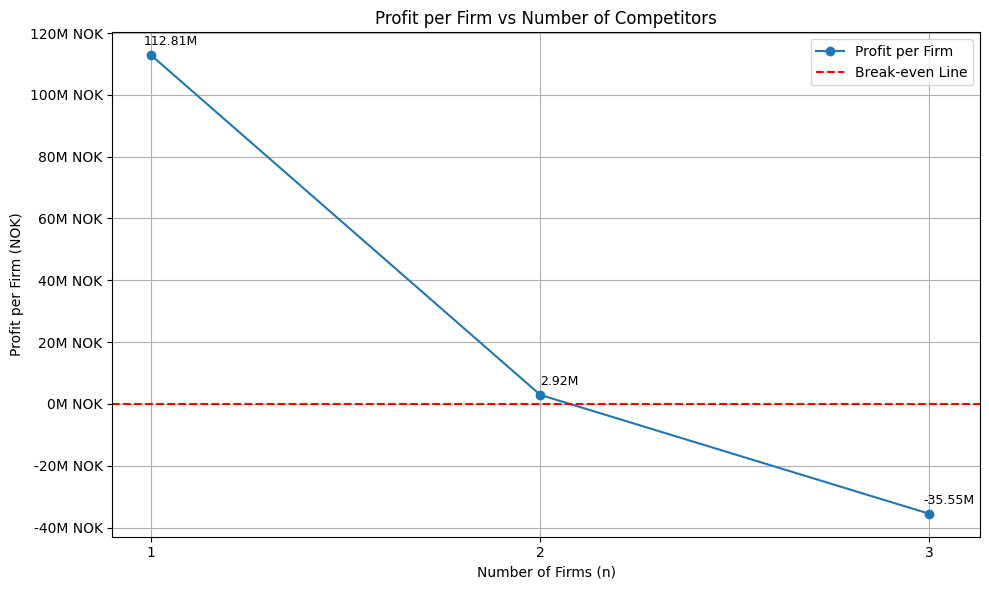

In [235]:
F_monopoly = df.loc[df["Market"].str.strip() == "Monopoly", "Fixed Costs (FC)"].iloc[0]
F_duopoly   = df.loc[df.Market=="Duopoly",   "Fixed Costs (FC)"].iloc[0]

def oligopoly_profit(q, n, mc, F_monopoly):
    """
    Compute the profit per firm in a symmetric oligopoly.
    Each firm produces q, so total quantity is Q_total = n * q.
    The market price is demand_price(Q_total), and profit per firm is:
       Profit = [demand_price(n * q)] * q - (mc * q + F)
    """
    if n == 1:
            F_total = F_monopoly
    elif n == 2:
        # Try to extract the Duopoly fixed cost from the data if available
        duopoly_rows = df[df["Market"].str.strip() == "Duopoly"]
        if not duopoly_rows.empty:
            F_total = duopoly_rows["Fixed Costs (FC)"].iloc[0]
        else:
            F_total = F_monopoly * 2
    elif n == 3:
        oligopoly_rows = df[df["Market"].str.strip() == "Oligopoly"]
        if not oligopoly_rows.empty:
            F_total = oligopoly_rows["Fixed Costs (FC)"].iloc[0]
        else:
            F_total = F_monopoly * 3
    else:
        F_total = F_monopoly * n

    F_company = F_total / n  # Fixed cost per firm
    Q_total = n * q
    price = demand_price(Q_total)
    revenue = price * q
    cost = mc * q + F_company
    return revenue - cost


results = []

for n in range(1, 20):
    # Equilibrium output per firm in symmetric Cournot: q = (a - mc_value) / [b * (n + 1)]
    q_n = (a - marginal_cost) / (b * (n + 1))
    Q_n = n * q_n  # Total market quantity
    P_n = demand_price(Q_n)  # Market price based on total quantity
    profit_n = oligopoly_profit(q_n, n, marginal_cost, F_monopoly)  # Profit per firm

    results.append({
        'Firms (n)': n,
        'Quantity per Firm': q_n,
        'Total Quantity': Q_n,
        'Price': P_n,
        'Profit per Firm': profit_n
    })

    if profit_n < 0:
        break

results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))

# Plot the profit per firm (in thousands) vs. number of firms.
plt.plot(results_df['Firms (n)'], results_df['Profit per Firm'], marker='o', label='Profit per Firm')

# Ensure the x-axis displays only integers.
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Draw a horizontal break-even line at zero.
plt.axhline(0, color='red', linestyle='--', label='Break-even Line')

plt.title('Profit per Firm vs Number of Competitors')
plt.xlabel('Number of Firms (n)')
plt.ylabel('Profit per Firm (NOK)')
plt.grid(True)

# Loop over the data points and add a numeric label for each profit value.
for idx, row in results_df.iterrows():
    n_val = row['Firms (n)']
    profit_val = row['Profit per Firm']
    plt.text(n_val + 0.05, profit_val + 0.02 * results_df['Profit per Firm'].max()
, f'{profit_val/1e6:.2f}M', ha='center', va='bottom', fontsize=9)

# Disable scientific notation and format the y-axis labels as plain integers with commas.
ax = plt.gca()
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M NOK'))

# Get the current x-axis limits
xlim_min, xlim_max = plt.xlim()

# Extend the right limit by 0.5 (or any amount you want)
plt.xlim(xlim_min, xlim_max + 0.03)

plt.legend()
plt.tight_layout()
plt.show()


In [236]:

def consumer_surplus(Q, P_eq):
    area, _ = quad(lambda q: demand_price(q) - P_eq, 0, Q)
    return area

# Market structure scenarios
scenarios = {
    'Monopoly': 1,
    'Duopoly': 2,
    'Oligopoly': 3,
}

structure_results = []

for label, n in scenarios.items():

    F_current = df.loc[df["Market"].str.strip() == label, "Fixed Costs (FC)"].iloc[0]
    # Calculate output per firm and total output
    q_n = (a - marginal_cost) / (b * (n + 1))
    Q_n = n * q_n
    P_n = demand_price(Q_n)
    CS = consumer_surplus(Q_n, P_n)
    PS = (P_n - marginal_cost) * Q_n - F_current
    TW = CS + PS

    structure_results.append({
        'Market Structure': label,
        'Firms (n)': n,
        'Price (P)': round(P_n, 2),
        'Total Quantity (Q)': round(Q_n, 2),
        'Consumer Surplus': round(CS, 2),
        'Producer Surplus': round(PS, 2),
        'Total Welfare': round(TW, 2)
    })

    #if PS < 0: # If profit is negative, stop the loop
    #    break

# Perfect Competition (Free Market)
label = 'Perfect Competition'
n = 10  # Approximation for infinite firms

F_perfect = df.loc[df["Market"].str.strip() == "Monopoly", "Fixed Costs (FC)"].iloc[0]
q_n = (a - marginal_cost) / (b * (n + 1))
Q_n = (a - marginal_cost) / b  # Socially optimal output
P_n = marginal_cost # In perfect competition, P = MC
CS = consumer_surplus(Q_n, P_n)
PS = - n * F_perfect # Variable profit is zero in perfect competition
TW = CS + PS

structure_results.append({
    'Market Structure': label,
    'Firms (n)': n,
    'Price (P)': round(P_n, 2),
    'Total Quantity (Q)': round(Q_n, 2),
    'Consumer Surplus': round(CS, 2),
    'Producer Surplus': round(PS, 2),
    'Total Welfare': round(TW, 2)
})

structure_df = pd.DataFrame(structure_results)
print(structure_df)

      Market Structure  Firms (n)  Price (P)  Total Quantity (Q)  \
0             Monopoly          1    2379.03           111189.38   
1              Duopoly          2    1786.02           148252.50   
2            Oligopoly          3    1489.51           166784.06   
3  Perfect Competition         10     600.00           222378.75   

   Consumer Surplus  Producer Surplus  Total Welfare  
0      9.890462e+07      1.128092e+08   2.117139e+08  
1      1.758304e+08      5.830430e+06   1.816609e+08  
2      2.225354e+08     -1.066431e+08   1.158923e+08  
3      3.956185e+08     -8.500000e+08  -4.543815e+08  


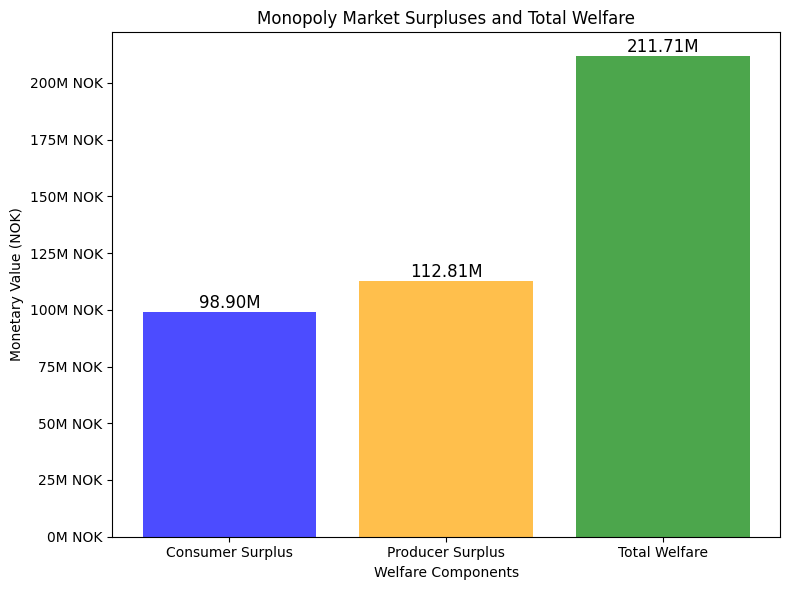

In [237]:
# Filter the results for Monopoly
monopoly_data = structure_df[structure_df['Market Structure'] == 'Monopoly']

if not monopoly_data.empty:
    monopoly_values = monopoly_data.iloc[0]
    
    # Define categories and corresponding values
    categories = ['Consumer Surplus', 'Producer Surplus', 'Total Welfare']
    values = [(monopoly_values['Consumer Surplus']), 
              (monopoly_values['Producer Surplus']), 
              (monopoly_values['Total Welfare'])]
    
    plt.figure(figsize=(8, 6))
    bars = plt.bar(categories, values, color=['blue', 'orange', 'green'], alpha=0.7)
    plt.xlabel('Welfare Components')
    plt.ylabel('Monetary Value (NOK)')
    plt.title('Monopoly Market Surpluses and Total Welfare')
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height/1e6:.2f}M', 
                 ha='center', va='bottom', fontsize=12)
    ax = plt.gca()
    ax.ticklabel_format(style='plain', axis='y')  # no scientific notation
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M NOK'))
    plt.tight_layout()
    plt.show()
else:
    print("No Monopoly data found in the results.")

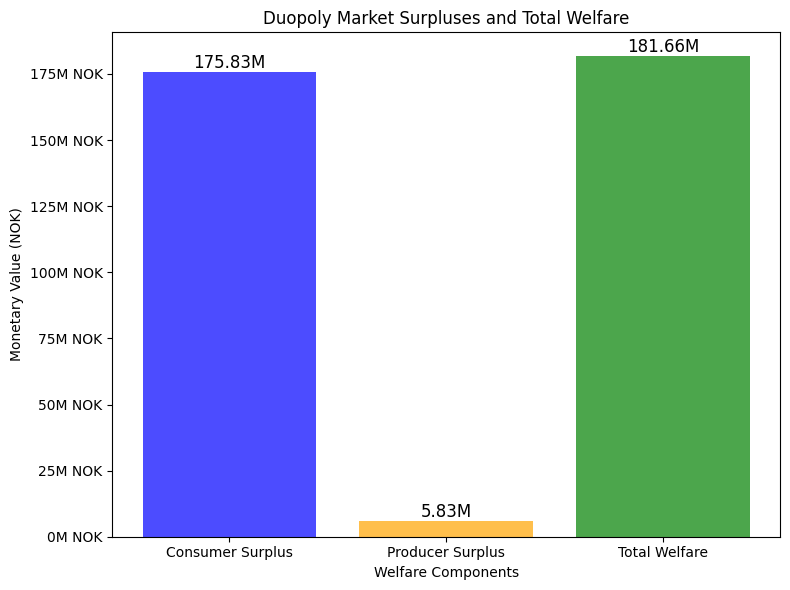

In [238]:
# Filter the results for the Duopoly scenario
duopoly_data = structure_df[structure_df['Market Structure'] == 'Duopoly']

if not duopoly_data.empty:
    duopoly_values = duopoly_data.iloc[0]
    
    # Define categories and corresponding values
    categories = ['Consumer Surplus', 'Producer Surplus', 'Total Welfare']
    values = [(duopoly_values['Consumer Surplus']), 
              (duopoly_values['Producer Surplus']), 
              (duopoly_values['Total Welfare'])]
    
    plt.figure(figsize=(8, 6))
    bars = plt.bar(categories, values, color=['blue', 'orange', 'green'], alpha=0.7)
    plt.xlabel('Welfare Components')
    plt.ylabel('Monetary Value (NOK)')
    plt.title('Duopoly Market Surpluses and Total Welfare')
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height/1e6:.2f}M', 
                 ha='center', va='bottom', fontsize=12)
    # Turn off scientific notation and force plain integer formatting on y-axis
    ax = plt.gca()
    ax.ticklabel_format(style='plain', axis='y')  # no scientific notation
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M NOK'))
    plt.tight_layout()
    plt.show()
else:
    print("No duopoly data found in the results.")

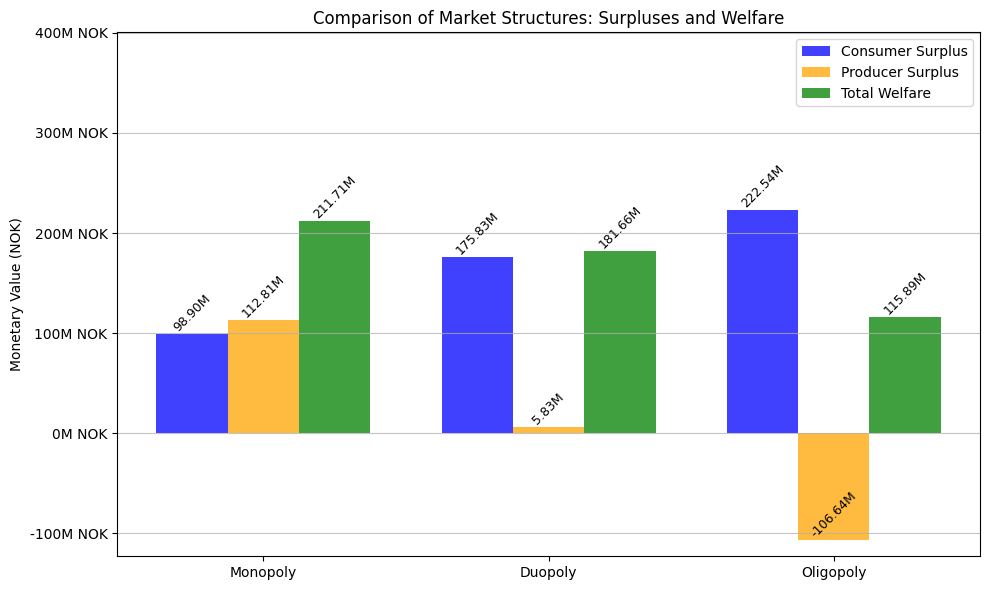

In [239]:
# Filter out the "Perfect Competition" row from the DataFrame
structure_df_oligopoly= structure_df[~structure_df['Market Structure'].str.contains("Perfect Competition")]

plt.figure(figsize=(10, 6))

x_labels = structure_df_oligopoly['Market Structure']
x = np.arange(len(x_labels)) 
bar_width = 0.25

# Use the values as-is (assuming they are already in NOK)
cs_thousands = structure_df_oligopoly['Consumer Surplus']
ps_thousands = structure_df_oligopoly['Producer Surplus']
tw_thousands = structure_df_oligopoly['Total Welfare']

bars_cs = plt.bar(x - bar_width, cs_thousands,
                  width=bar_width, 
                  label='Consumer Surplus',
                  color='blue', 
                  alpha=0.75)
bars_ps = plt.bar(x, ps_thousands,
                  width=bar_width,
                  label='Producer Surplus',
                  color='orange',
                  alpha=0.75)
bars_tw = plt.bar(x + bar_width, tw_thousands,
                  width=bar_width,
                  label='Total Welfare',
                  color='green',
                  alpha=0.75)

# Calculate maximum bar height for y-axis margin adjustment
max_bar_height = max(cs_thousands.max(), ps_thousands.max(), tw_thousands.max())

plt.xticks(ticks=x, labels=x_labels)
plt.ylabel("Monetary Value (NOK)")
plt.title("Comparison of Market Structures: Surpluses and Welfare")
plt.legend()
plt.grid(axis='y', alpha=0.75)

# Add numeric labels above each bar (displayed in millions with 2 decimals)
for bars in [bars_cs, bars_ps, bars_tw]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2,
                 height,
                 f'{height/1e6:.2f}M', 
                 ha='center', va='bottom', fontsize=9, rotation=45)

margin = 0.8 * max_bar_height
plt.ylim(top=max_bar_height + margin)

# Force plain integer formatting on the y-axis with numbers in millions
ax = plt.gca()
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M NOK'))

plt.tight_layout()
plt.show()

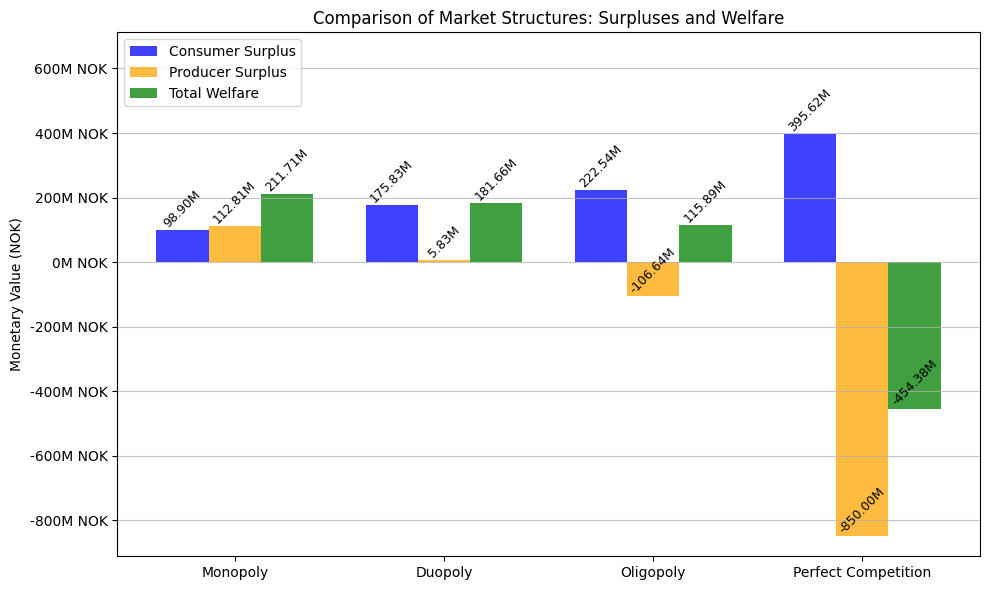

In [240]:
plt.figure(figsize=(10, 6))

x_labels = structure_df['Market Structure']
x = np.arange(len(x_labels))  # numeric positions
bar_width = 0.25

cs_thousands = structure_df['Consumer Surplus']
ps_thousands = structure_df['Producer Surplus'] 
tw_thousands = structure_df['Total Welfare']

# Plot each bar group
bars_cs = plt.bar(x - bar_width, cs_thousands,
                  width=bar_width, 
                  label='Consumer Surplus',
                  color='blue', 
                  alpha=0.75)

bars_ps = plt.bar(x, ps_thousands,
                  width=bar_width,
                  label='Producer Surplus',
                  color='orange',
                  alpha=0.75)

bars_tw = plt.bar(x + bar_width, tw_thousands,
                  width=bar_width,
                  label='Total Welfare',
                  color='green',
                  alpha=0.75)

max_bar_height = max(cs_thousands.max(), ps_thousands.max(), tw_thousands.max())

plt.xticks(ticks=x, labels=x_labels)
plt.ylabel("Monetary Value (NOK)")
plt.title("Comparison of Market Structures: Surpluses and Welfare")
plt.legend()
plt.grid(axis='y', alpha=0.75)

# Add numeric labels above each bar
for bars in [bars_cs, bars_ps, bars_tw]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2,
                 height,
                 f'{height/1e6:.2f}M',
                 ha='center', va='bottom', fontsize=9, rotation=45)

margin = 0.8 * max_bar_height
plt.ylim(top=max_bar_height + margin)

ax = plt.gca()
ax.ticklabel_format(style='plain', axis='y')  # no scientific notation
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M NOK'))
plt.tight_layout()
plt.show()


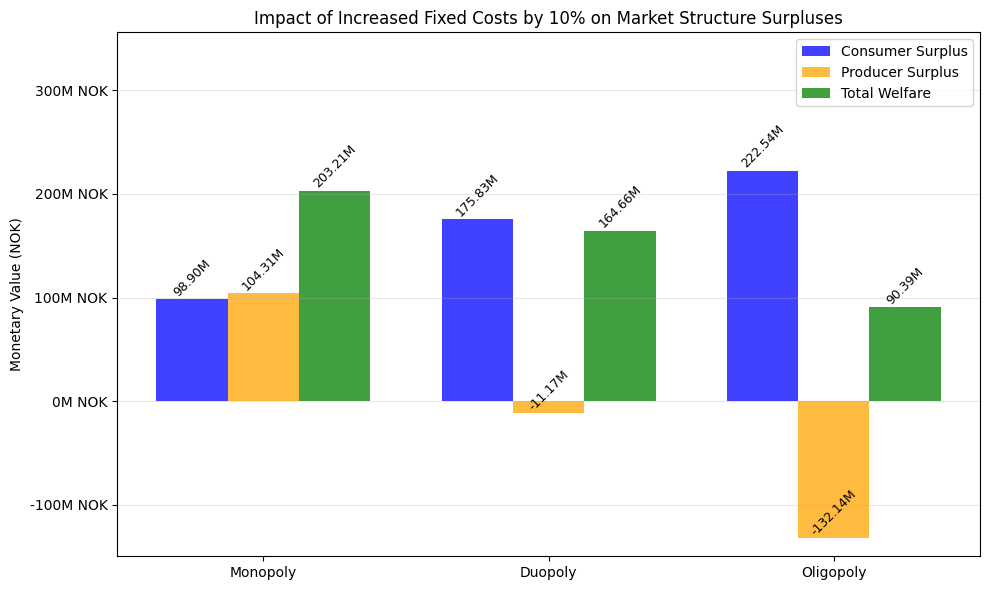

In [241]:

structure_results_high_FC = []

for label, n in scenarios.items():
    q_n = (a - marginal_cost) / (b * (n + 1))
    Q_n = n * q_n
    P_n = demand_price(Q_n)
    CS = consumer_surplus(Q_n, P_n)
    PS = (P_n - marginal_cost) * Q_n - n * F_high
    TW = CS + PS

    structure_results_high_FC.append({
        'Market Structure': label,
        'Firms (n)': n,
        'Price (P)': round(P_n, 2),
        'Total Quantity (Q)': round(Q_n, 2),
        'Consumer Surplus': round(CS, 2),
        'Producer Surplus': round(PS, 2),
        'Total Welfare': round(TW, 2)
    })

structure_high_FC_df = pd.DataFrame(structure_results_high_FC)


plt.figure(figsize=(10, 6))

x_labels = structure_high_FC_df['Market Structure']
x = np.arange(len(x_labels))  # numeric positions

bar_width = 0.25
alpha_value = 0.75


cs_values = structure_high_FC_df['Consumer Surplus']
ps_values = structure_high_FC_df['Producer Surplus']
tw_values = structure_high_FC_df['Total Welfare']

bars_cs = plt.bar(x - bar_width, cs_values, width=bar_width,
                  color='blue', alpha=alpha_value, label='Consumer Surplus')
bars_ps = plt.bar(x, ps_values, width=bar_width,
                  color='orange', alpha=alpha_value, label='Producer Surplus')
bars_tw = plt.bar(x + bar_width, tw_values, width=bar_width,
                  color='green', alpha=alpha_value, label='Total Welfare')

max_bar_height = max(cs_values.max(), ps_values.max(), tw_values.max())

plt.xticks(ticks=x, labels=x_labels, rotation=0)
plt.ylabel("Monetary Value (NOK)")
plt.title("Impact of Increased Fixed Costs by 10% on Market Structure Surpluses")

for bars in [bars_cs, bars_ps, bars_tw]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2,
                 height,
                 f'{height/1e6:.2f}M',
                 ha='center', va='bottom', fontsize=9, rotation=45)

plt.legend()

ax = plt.gca()
ax.ticklabel_format(style='plain', axis='y') 
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M NOK'))

margin = 0.6 * max_bar_height
plt.ylim(top=max_bar_height + margin)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

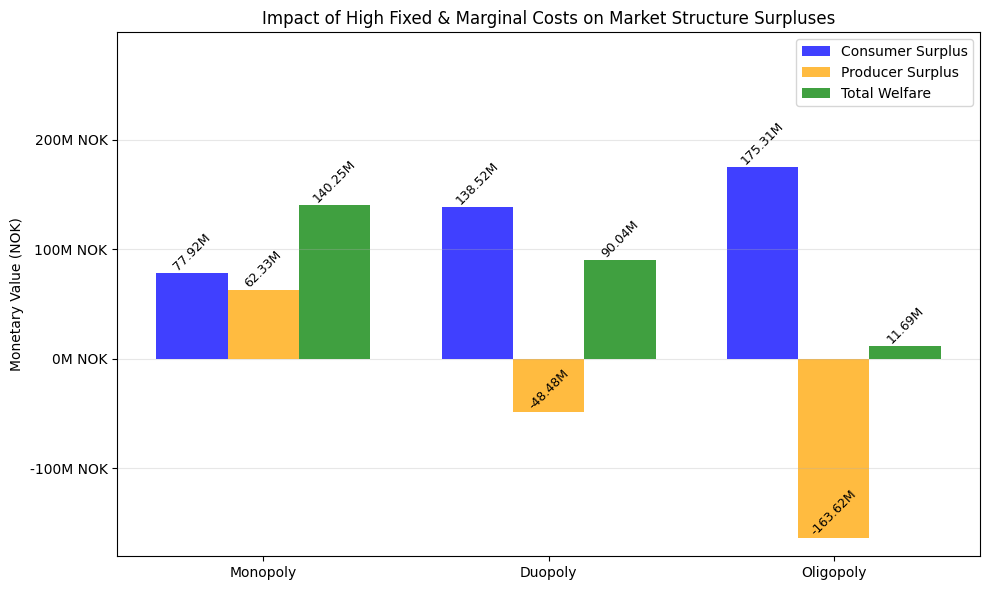

In [242]:
# Recalculate all metrics with both high FC and MC
structure_results_high_both = []

for label, n in scenarios.items():
    # Calculate output per firm and total output
    q_n = (a - c_high) / (b * (n + 1))
    Q_n = n * q_n
    P_n = demand_price(Q_n)
    CS = consumer_surplus(Q_n, P_n)
    PS = (P_n - c_high) * Q_n - n * F_high
    TW = CS + PS

    structure_results_high_both.append({
        'Market Structure': label,
        'Firms (n)': n,
        'Price (P)': round(P_n, 2),
        'Total Quantity (Q)': round(Q_n, 2),
        'Consumer Surplus': round(CS, 2),
        'Producer Surplus': round(PS, 2),
        'Total Welfare': round(TW, 2)
    })

structure_high_both_df = pd.DataFrame(structure_results_high_both)

plt.figure(figsize=(10, 6))

x_labels = structure_high_both_df['Market Structure']
x = np.arange(len(x_labels))  
bar_width = 0.25
alpha_value = 0.75

# Extract the columns
cs_values = structure_high_both_df['Consumer Surplus']
ps_values = structure_high_both_df['Producer Surplus']
tw_values = structure_high_both_df['Total Welfare']

bars_cs = plt.bar(x - bar_width, cs_values, width=bar_width,
                  color='blue', alpha=alpha_value, label='Consumer Surplus')
bars_ps = plt.bar(x, ps_values, width=bar_width,
                  color='orange', alpha=alpha_value, label='Producer Surplus')
bars_tw = plt.bar(x + bar_width, tw_values, width=bar_width,
                  color='green', alpha=alpha_value, label='Total Welfare')

plt.xticks(ticks=x, labels=x_labels, rotation=0)
plt.ylabel("Monetary Value (NOK)")
plt.title("Impact of High Fixed & Marginal Costs on Market Structure Surpluses")

# Numeric labels on each bar
for bars in [bars_cs, bars_ps, bars_tw]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2,
                 height,
                 f'{height/1e6:.2f}M',
                 ha='center', va='bottom', fontsize=9, rotation=45)

plt.legend()


ax = plt.gca()
ax.ticklabel_format(style='plain', axis='y') 
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M NOK'))

# Add a slight margin to top of y-axis
max_bar = max(cs_values.max(), ps_values.max(), tw_values.max())
margin = 0.7 * max_bar
plt.ylim(top=margin + max_bar)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Could be used to show natural monopoly if we argue that the market has very high costs in the northern norway due to unstable demand and weather conditions i.e.

## Repeated Stackelberg game

In the **Stackelberg leadership model**, one firm (the leader) commits to its production decision first, forcing the other firm (the follower) to adjust its output based on the leader’s choice. Here, the leader’s equilibrium output is calculated as

$$
q_A^{\text{stackelberg}} = \frac{a - \text{marginal\_cost}}{2b}.
$$

Once the leader’s output is set, the follower responds using its best-response function, captured by `wideroe_reaction(qA_stackelberg)`, giving

$$
q_B^{\text{stackelberg}} = \text{wideroe\_reaction}(q_A^{\text{stackelberg}}).
$$

Additionally, an alternative “aggressive” response by the follower is computed via `aggressive_reaction(qA_stackelberg)`. To visualize these strategic interactions, reaction functions for various potential outputs are generated:

- **qA_vals** spans possible leader outputs.
- **qB_vals_standard** and **qB_vals_aggressive** compute the corresponding follower outputs under the standard and aggressive strategies, respectively.
- **flyviking_reaction** is used to derive the leader’s response to a range of follower outputs.

This setup demonstrates how, in Stackelberg competition, the leader’s commitment shapes the follower’s decision and allows for a comparison between the standard equilibrium and a more aggressive follower response.

In [243]:
# Reaction‐function definitions
def stackelberg_equilibrium(a, b, mc):
    qA = (a - mc) / (2 * b)
    qB = (a - mc - b * qA) / (2 * b)
    return qA, qB    

def wideroe_reaction(qA, a, b, mc):
    """Standard Cournot best‐response of Widerøe to FlyViking quantity qA."""
    return (a - mc - b * qA) / (2 * b)

def aggressive_reaction(qA, a, b, mc, factor=2):
    """Widerøe “matches price undercutting” at ‘factor’× its standard BR."""
    return factor * wideroe_reaction(qA, a, b, mc)

def flyviking_reaction(qB, a, b, mc):
    """FlyViking’s Cournot best‐response to Widerøe quantity qB."""
    return (a - mc - b * qB) / (2 * b)

def firm_profit(q_i, q_j, mc, F, n_firms):
    """
    Compute firm i’s profit given its own output q_i, rival’s output q_j,
    unit margin cost mc, and fixed cost F.
    """
    Q_tot = q_i + q_j
    price = demand_price(Q_tot)      
    revenue    = price * q_i
    var_cost   = mc   * q_i
    profit_i   = revenue - (var_cost + (F/(n_firms)))
    return profit_i


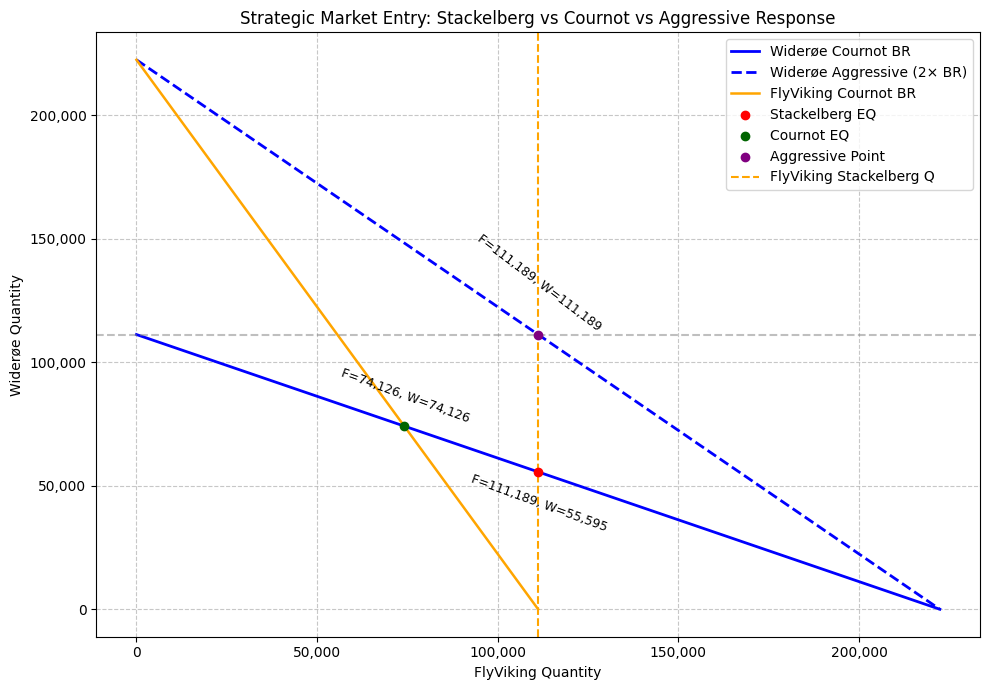

In [244]:

# Compute equilibrium points
qA_stack, qB_stack = stackelberg_equilibrium(a, b, marginal_cost)
qB_aggr       = aggressive_reaction(qA_stack, a, b, marginal_cost)
q_cour        = (a - marginal_cost) / (3 * b)    # symmetric Cournot
qA_cour, qB_cour = q_cour, q_cour

# Build plotting grids
qA_vals       = np.linspace(0, (a - marginal_cost)/b, 200)
qB_std_vals   = wideroe_reaction(qA_vals, a, b, marginal_cost)
qB_aggr_vals  = aggressive_reaction(qA_vals, a, b, marginal_cost)
qB_range      = np.linspace(0, (a - marginal_cost)/b, 200)
qA_react_vals = flyviking_reaction(qB_range, a, b, marginal_cost)

# Plot
plt.figure(figsize=(10,7))

plt.plot(qA_vals,       qB_std_vals,   color='blue', linewidth=2,
         label="Widerøe Cournot BR")
plt.plot(qA_vals,       qB_aggr_vals, linestyle='--', color='blue', linewidth=2,
         label="Widerøe Aggressive (2× BR)")
plt.plot(qA_react_vals, qB_range,      color='orange', linewidth=1.8,
         label="FlyViking Cournot BR")

# Equilibrium dots
plt.scatter(qA_stack, qB_stack,       color='red',       label='Stackelberg EQ',    zorder=5)
plt.scatter(qA_cour,  qB_cour,        color='darkgreen', label='Cournot EQ',         zorder=5)
plt.scatter(qA_stack, qB_aggr,        color='purple',    label='Aggressive Point',   zorder=5)

# Vertical/horizontal guides
plt.axvline(qA_stack, color='orange', linestyle='--', linewidth=1.5,
            label="FlyViking Stackelberg Q")
plt.axhline(qB_aggr, color='gray',   linestyle='--', alpha=0.5)

# Labels for each point
x_off, y_off = 200, 500
plt.text(qA_stack + x_off, qB_stack - y_off,
         f"F={qA_stack:,.0f}, W={qB_stack:,.0f}",
         ha='center', va='top', fontsize=9, rotation=-20)
plt.text(qA_cour + x_off,  qB_cour + y_off,
         f"F={qA_cour:,.0f}, W={qB_cour:,.0f}",
         ha='center', va='bottom', fontsize=9, rotation=-20)
plt.text(qA_stack + x_off, qB_aggr + y_off,
         f"F={qA_stack:,.0f}, W={qB_aggr:,.0f}",
         ha='center', va='bottom', fontsize=9, rotation=-37)

# Axes & legend
plt.xlabel("FlyViking Quantity")
plt.ylabel("Widerøe Quantity")
plt.title("Strategic Market Entry: Stackelberg vs Cournot vs Aggressive Response")
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

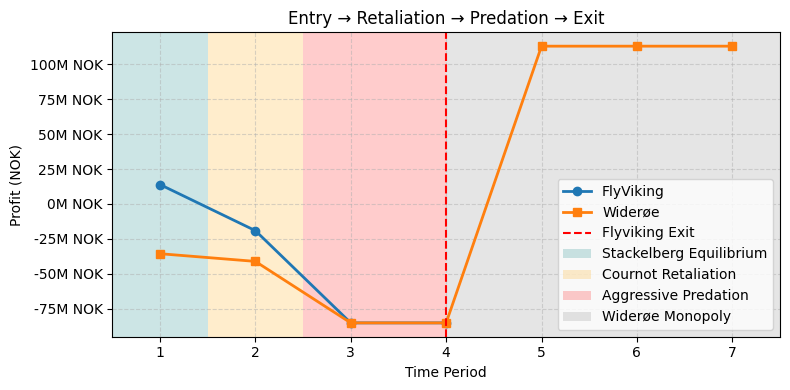

In [245]:
# Number of periods + monopoly profit
pi_mono = profit(Q_mono, marginal_cost, fixed_cost_monopoly)

T     = 7
times = np.arange(1, T+1)

# Compute equilibrium quantities
qA_s, qB_s = stackelberg_equilibrium(a, b, marginal_cost)
q_cour    = (a - marginal_cost)/(3*b)
qB_pred   = aggressive_reaction(qA_s, a, b, marginal_cost, factor=2)

# Compute per‑period profits
piA_1 = firm_profit(qA_s,     qB_s,    marginal_cost, fixed_cost_monopoly, 1)   # Entry
piB_1 = firm_profit(qB_s,     qA_s,    marginal_cost, fixed_cost_monopoly, 1)

piA_2 = firm_profit(qA_s,     q_cour,  marginal_cost, fixed_cost_monopoly, 1)   # Retaliation
piB_2 = firm_profit(q_cour,   qA_s,    marginal_cost, fixed_cost_monopoly, 1)

piA_3 = firm_profit(qA_s,     qB_pred, marginal_cost, fixed_cost_monopoly, 1)   # Predation
piB_3 = firm_profit(qB_pred,  qA_s,    marginal_cost, fixed_cost_monopoly, 1)

piA_4 = piA_3  # second predation round
piB_4 = piB_3

# Periods 5–7) FlyViking exits; Widerøe back to monopoly
piA_exit = np.nan
piB_exit = pi_mono

# Build the series
series_A = [piA_1, piA_2, piA_3, piA_4] + [piA_exit]*(T-4)
series_B = [piB_1, piB_2, piB_3, piB_4] + [piB_exit]*(T-4)

# Plot 
fig, ax = plt.subplots(figsize=(8,4))

# Profit lines
ax.plot(times, series_A, 'o-', label="FlyViking", linewidth=2)
ax.plot(times, series_B, 's-', label="Widerøe",   linewidth=2)

# Exit marker & shading
ax.axvline(4, color='red', linestyle='--', label="Flyviking Exit")

# get the current y‑limits
ymin, ymax = ax.get_ylim()

# define per‑stage labels with y‑staggering
phases = [
    (0.5, 1.5, 'Stackelberg Equilibrium', 'teal'),
    (1.5, 2.5, 'Cournot Retaliation',    'orange'),
    (2.5, 4.0, 'Aggressive Predation',   'red'),
    (4.0, 7.5, 'Widerøe Monopoly',          'gray'),
]

for start, end, label, col in phases:
    ax.axvspan(
        start, end,
        facecolor=col,
        alpha=0.20,   
        label=label
    )

# Axes & styling
ax.set_xticks(times)
ax.set_xlabel("Time Period")
ax.set_xlim(0.5, 7.5)
ax.set_ylabel("Profit (NOK)")
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f"{x/1e6:.0f}M NOK")
)
ax.set_title("Entry → Retaliation → Predation → Exit")
ax.legend(loc="lower right")
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

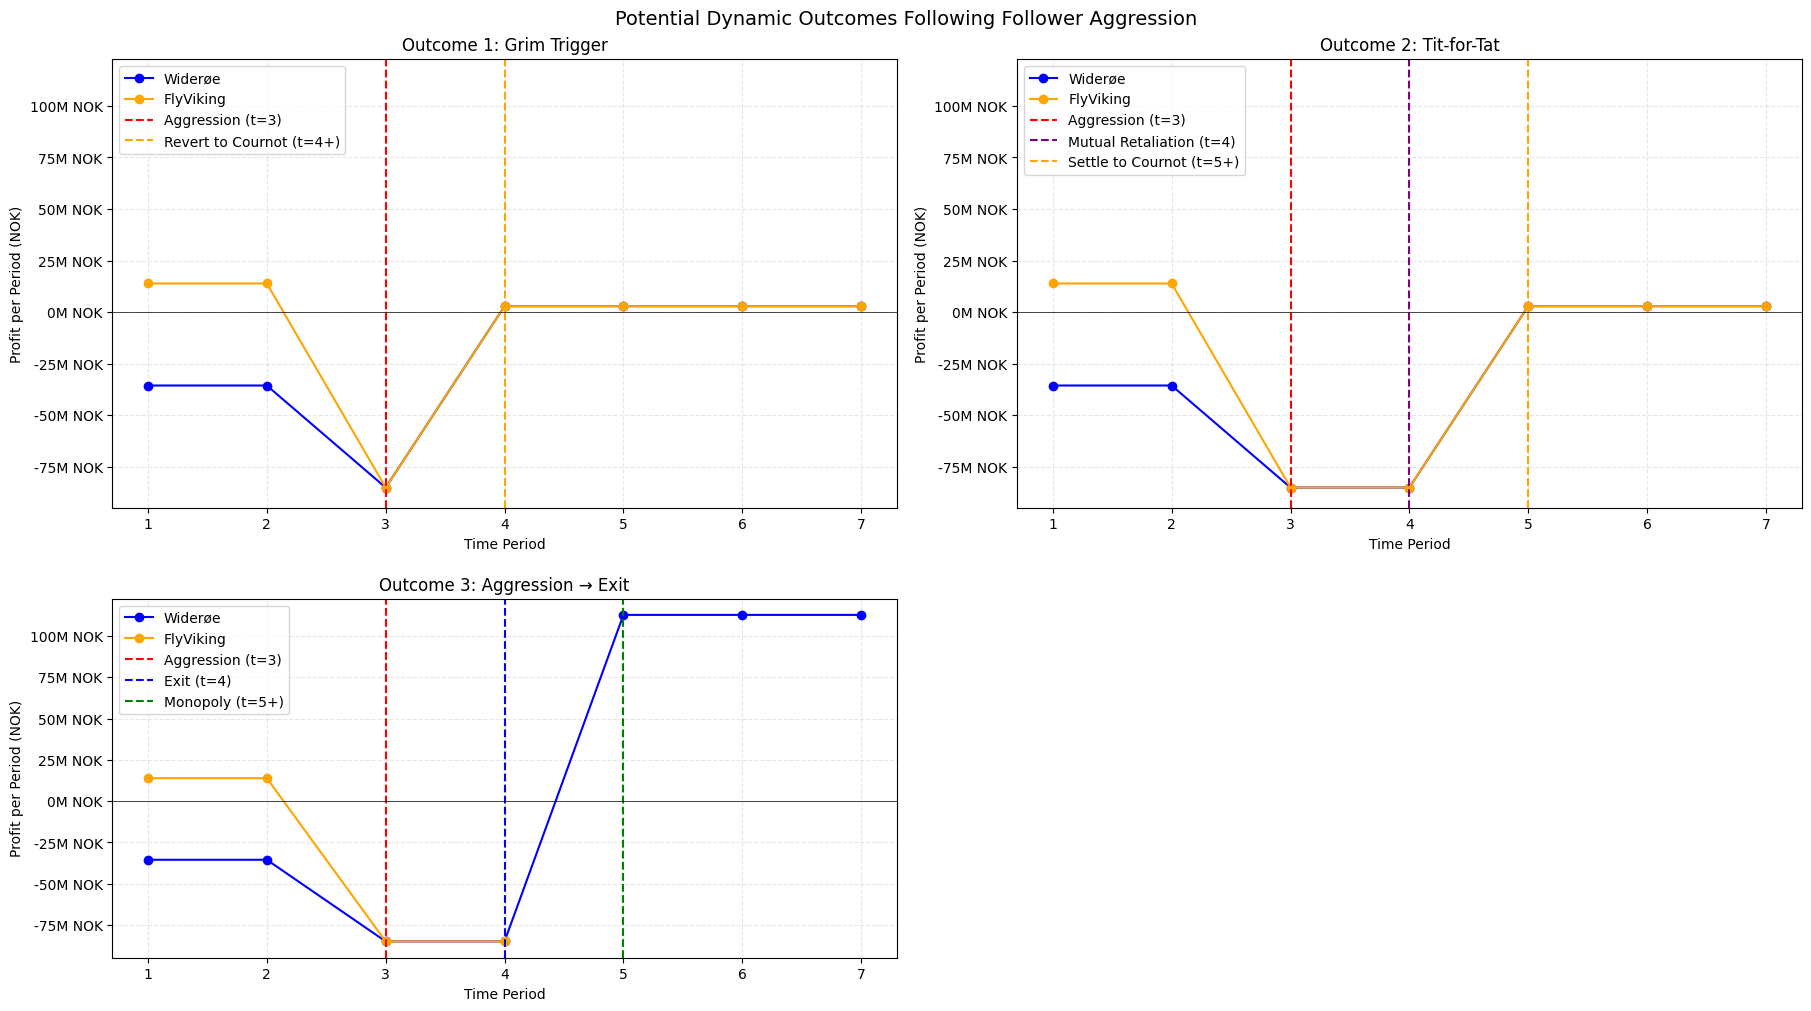

In [246]:
# Precompute all the key profit levels:
pi_cournot_firm    = firm_profit(q_cour, q_cour, marginal_cost, F_duopoly, 2)
pi_W_mutual_aggr   = firm_profit(qB_aggr, qB_aggr, marginal_cost, F_duopoly, 2)
pi_F_mutual_aggr   = firm_profit(qB_aggr, qB_aggr, marginal_cost, F_duopoly, 2)
pi_mono_W          = firm_profit(Q_mono, 0, marginal_cost, fixed_cost_monopoly, 1)

T = 7
times = np.arange(1, T+1)

# Build each panel’s profit series with the new timing:
plot1_W = []
plot1_F = []
plot2_W = []
plot2_F = []
plot3_W = []
plot3_F = []

# Panel 1: Grim Trigger (Revert to Cournot after predation)
for t in times:
    if t == 1:
        # Entry as Stackelberg
        qA1, qB1 = qA_s, qB_s
    elif t == 2:
        # Follower does standard retaliation (Stackelberg follower BR)
        qA1, qB1 = qA_s, wideroe_reaction(qA_s, a, b, marginal_cost)
    elif t == 3:
        # Follower goes aggressive
        qA1, qB1 = qA_s, qB_aggr
    else:
        # t >= 4: revert to Cournot duopoly
        qA1, qB1 = q_cour, q_cour

    plot1_F.append(firm_profit(qA1, qB1, marginal_cost, F_duopoly, 2))
    plot1_W.append(firm_profit(qB1, qA1, marginal_cost, F_duopoly, 2))


    # Panel 2: Tit-for-Tat (Aggression → Mutual Retaliation → Settle) ---
    if t == 1:
        qA2, qB2 = qA_s, qB_s
    elif t == 2:
        # Standard retaliation
        qA2, qB2 = qA_s, wideroe_reaction(qA_s, a, b, marginal_cost)
    elif t == 3:
        # Entrant pre‐empts with aggression
        qA2, qB2 = qA_s, qB_aggr
    elif t == 4:
        # Mutual aggression (both play qB_aggr)
        qA2, qB2 = qB_aggr, qB_aggr
    else:
        # t >= 5: settle back to Cournot
        qA2, qB2 = q_cour, q_cour

    plot2_F.append(firm_profit(qA2, qB2, marginal_cost, F_duopoly, 2))
    plot2_W.append(firm_profit(qB2, qA2, marginal_cost, F_duopoly, 2))

# Panel 3 Aggression and flyviking exit
for t in times:
    if t == 1:
        # Entry (Stackelberg leader moves)
        qA3, qB3 = qA_s, qB_s
    elif t == 2:
        # Standard retaliation (Follower uses Cournot BR)
        qA3, qB3 = qA_s, wideroe_reaction(qA_s, a, b, marginal_cost)
    elif t in (3, 4):
        # Aggression held for two periods (same as Panel 2’s mutual‐aggression span)
        qA3, qB3 = qA_s, qB_aggr
    else:
        # t >= 5: Exit → monopoly
        qA3, qB3 = 0, Q_mono

    plot3_F.append(firm_profit(qA3, qB3, marginal_cost, F_duopoly, 2))
    plot3_W.append(firm_profit(qB3, qA3, marginal_cost, F_duopoly, 2))


# Plot all three panels
fig, axes = plt.subplots(2, 2, figsize=(18, 10), sharey=True,
                         constrained_layout=True,
                         gridspec_kw={"height_ratios": [1, 0.8], "hspace": 0.05})

# Top row: Grim Trigger & Tit-for-Tat
ax1 = axes[0, 0]
ax2 = axes[0, 1]

# Bottom left: Aggression→Exit
ax3 = axes[1, 0]

# Hide the unused bottom-right subplot
axes[1, 1].axis("off")


# Panel 1
ax1.plot(times, plot1_W, 'o-', c='blue',   label='Widerøe')
ax1.plot(times, plot1_F, 'o-', c='orange', label='FlyViking')
ax1.axvline(3, c='red',    ls='--', label='Aggression (t=3)')
ax1.axvline(4, c='orange', ls='--', label='Revert to Cournot (t=4+)')
ax1.set_title("Outcome 1: Grim Trigger")

# Panel 2
ax2.plot(times, plot2_W, 'o-', c='blue',   label='Widerøe')
ax2.plot(times, plot2_F, 'o-', c='orange', label='FlyViking')
ax2.axvline(3, c='red',    ls='--', label='Aggression (t=3)')
ax2.axvline(4, c='purple', ls='--', label='Mutual Retaliation (t=4)')
ax2.axvline(5, c='orange', ls='--', label='Settle to Cournot (t=5+)')
ax2.set_title("Outcome 2: Tit-for-Tat")

# Panel 3
ax3.plot(times, plot3_W, 'o-',   c='blue',   label='Widerøe')
ax3.plot(times[:4], plot3_F[:4], 'o-', c='orange', label='FlyViking')
ax3.axvline(3, c='red',   ls='--', label='Aggression (t=3)')
ax3.axvline(4, c='blue', ls='--', label='Exit (t=4)')
ax3.axvline(5, c='green', ls='--', label='Monopoly (t=5+)')
ax3.set_title("Outcome 3: Aggression → Exit")

for ax in (ax1, ax2, ax3):
    ax.set_xticks(times)
    ax.tick_params(labelleft=True)
    ax.set_xlabel("Time Period")
    ax.set_ylabel("Profit per Period (NOK)")
    ax.axhline(0, color='k', linewidth=0.5)
    ax.grid(True, ls='--', alpha=0.3)
    ax.legend(loc="upper left")
    ax.yaxis.set_major_formatter(
        ticker.FuncFormatter(lambda x, _: f"{x/1e6:.0f}M NOK")
    )

plt.suptitle("Potential Dynamic Outcomes Following Follower Aggression", fontsize=14)
plt.show()

In [247]:
# Firm profits
def firm_profit(q_i, q_j, mc, F_total, n_firms):
    """
    q_i     = this firm’s output
    q_j     = rival’s output
    mc      = marginal cost
    F_total = total fixed cost for the market
    n_firms = how many firms share F_total equally
    """
    Q = q_i + q_j
    price = demand_price(Q)
    share = F_total / n_firms
    return price*q_i - (mc*q_i + share)

# Welfare helper
def calculate_welfare(qA, qB, mc, F_total, n_firms):
    """
    Returns a dict with CS, PS_A, PS_B, and Total Welfare
    """
    Q = qA + qB
    P = demand_price(Q)
    pi_A = (P - mc)*qA - (F_total / n_firms)
    pi_B = (P - mc)*qB - (F_total / n_firms)
    CS   = 0.5 * Q * (a - P)
    return {
        'Consumer Surplus': CS,
        'Wideroe Surplus': pi_B,
        'FlyViking Surplus': pi_A,
        'Total Welfare':  pi_A + pi_B + CS
    }

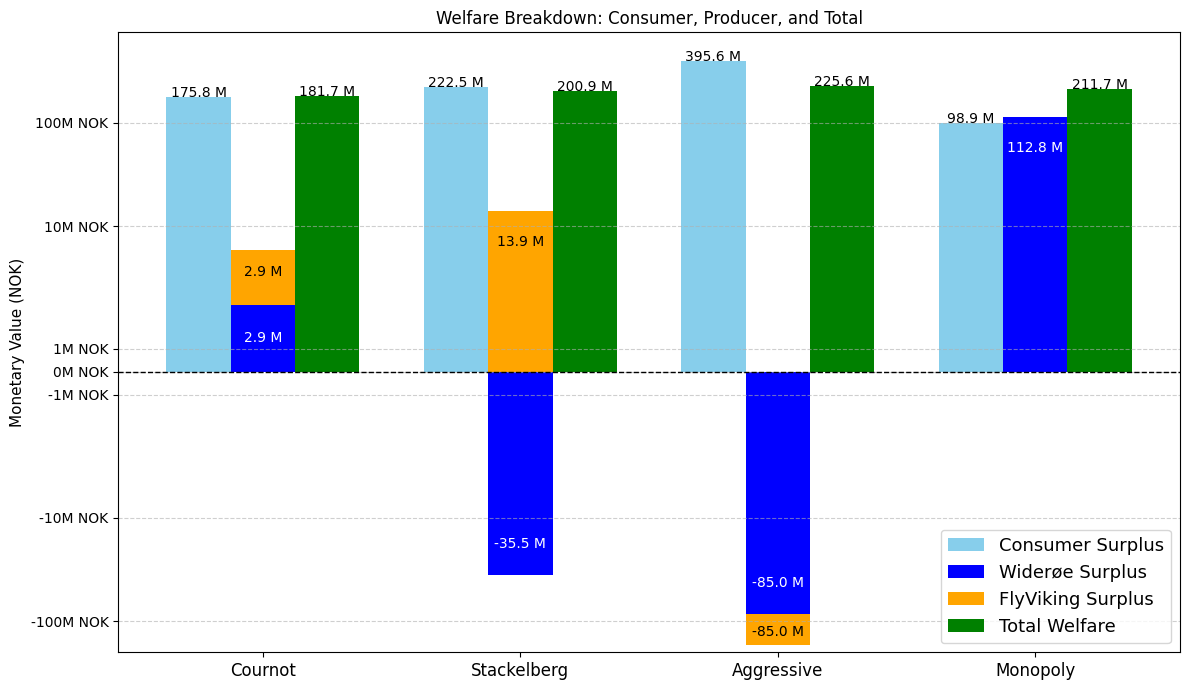

In [248]:

# Equilibrium quantities 
q_cour    = (a - marginal_cost) / (3 * b)                     # symmetric Cournot
qA_stack, qB_stack = stackelberg_equilibrium(a, b, marginal_cost)
qB_aggr  = aggressive_reaction(qA_stack, a, b, marginal_cost, factor=2)
Q_mono   = (a - marginal_cost) / (2 * b)                     # monopoly
width    = 0.25

# Compute welfare details once 
w_cour   = calculate_welfare(q_cour,    q_cour,       marginal_cost, F_duopoly,   2)
w_stack  = calculate_welfare(qA_stack,  qB_stack,     marginal_cost, F_duopoly,   2)
w_aggr   = calculate_welfare(qA_stack,  qB_aggr,      marginal_cost, F_duopoly,   2)
w_mono   = calculate_welfare(0, Q_mono,           marginal_cost, F_monopoly,  1)

# Extract for plotting 
labels = ['Cournot', 'Stackelberg', 'Aggressive', 'Monopoly']
x      = np.arange(len(labels))  # numeric positions

cs  = [w_cour['Consumer Surplus'],
       w_stack['Consumer Surplus'],
       w_aggr['Consumer Surplus'],
       w_mono['Consumer Surplus']]

psW = [w_cour['Wideroe Surplus'],
       w_stack['Wideroe Surplus'],
       w_aggr['Wideroe Surplus'],
       w_mono['Wideroe Surplus']]

psF = [w_cour['FlyViking Surplus'],
       w_stack['FlyViking Surplus'],
       w_aggr['FlyViking Surplus'],
       0]  # no FlyViking in monopoly

tw = []
for i, label in enumerate(labels):
    if label == 'Monopoly':
        # drop FlyViking here
        tw.append(cs[i] + psW[i])
    else:
        # full sum elsewhere
        tw.append(cs[i] + psW[i] + psF[i])

# Convert to arrays
cs  = np.array(cs)
psW = np.array(psW)
psF = np.array(psF)
tw  = np.array(tw)

# starts FlyViking from zero if Widerøe < 0.  Everyone else stacks normally.
bottom_F = psW.copy()
# for stackelberg column:
bottom_F[1] = max(psW[1], 0)

plt.figure(figsize=(12,7))

# Consumer
plt.bar(x - width, cs,  width, label='Consumer Surplus', color='skyblue')

# Widerøe
plt.bar(x, psW, width, label='Widerøe Surplus', color='blue')
# FlyViking
plt.bar(x, psF, width, bottom=bottom_F,
        label='FlyViking Surplus', color='orange')

# Total welfare
plt.bar(x + width, tw, width, label='Total Welfare', color='green')

# Annotations
for i in range(len(labels)):
    # Consumer
    plt.text(x[i] - width, cs[i] + 1e6,
             f"{cs[i]/1e6:.1f} M", ha='center')

    # Widerøe—always white text
    yW_mid = psW[i] / 2
    plt.text(x[i], yW_mid,
             f"{psW[i]/1e6:.1f} M",
             ha='center', va='center', color='white')

    # FlyViking (if >0)
    if psF[i] != 0:
        yF_mid = bottom_F[i] + psF[i]/2
        plt.text(x[i], yF_mid,
                 f"{psF[i]/1e6:.1f} M",
                 ha='center', va='center')

    # Total
    plt.text(x[i] + width, tw[i] + 1e6,
             f"{tw[i]/1e6:.1f} M", ha='center')

# Breakeven line & styling
plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.xticks(x, labels, fontsize=12)
plt.ylabel("Monetary Value (NOK)", fontsize=11)
plt.title("Welfare Breakdown: Consumer, Producer, and Total")
plt.legend(loc="lower right", fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.gca().set_yscale('symlog', linthresh=5e6)
plt.gca().set_ylim(-200e6, 750e6)
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda v, _: f"{v/1e6:.0f}M NOK")
)

plt.tight_layout()
plt.show()

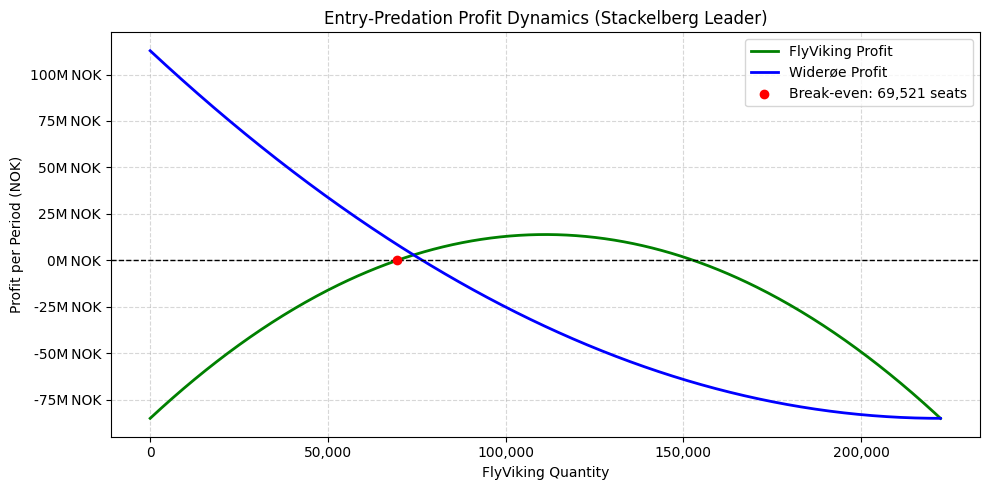

In [249]:
# Sweep qA from 0 up to the choke price quantity
qA_max    = (a - marginal_cost) / b          # where price falls to mc
fly_q_range = np.linspace(0, qA_max, 500)

# Compute Widerøe’s best‐response qB(qA) for each qA
wideroe_q_range = wideroe_reaction(fly_q_range, a, b, marginal_cost)

# Market price
total_Q = fly_q_range + wideroe_q_range
price   = demand_price(total_Q)

# Per‑period profit for FlyViking (duopoly: each firm pays half)
fly_profit = price*fly_q_range \
             - (marginal_cost*fly_q_range + F_duopoly/2)

wideroe_profit = price*wideroe_q_range \
                 - (marginal_cost*wideroe_q_range + F_duopoly/2)

#Locate break‑even qA (first index where profit ≥ 0)
pos_idx = np.where(fly_profit >= 0)[0]
if pos_idx.size:
    be_idx = pos_idx[0]
    be_q   = fly_q_range[be_idx]
    be_pi  = fly_profit[be_idx]
else:
    be_q, be_pi = None, None

#Plot
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(fly_q_range, fly_profit,    color='green', label="FlyViking Profit", linewidth=2)
ax.plot(fly_q_range, wideroe_profit, color='blue',  label="Widerøe Profit",  linewidth=2)
ymin, ymax = ax.get_ylim()
y_offset   = (ymax - ymin) * 0.03 

if be_q is not None:
    ax.scatter(be_q, be_pi, color='red', zorder=5, label=f"Break-even: {be_q:,.0f} seats")

ax.axhline(0, color='black', linestyle='--', linewidth=1)

ax.set_xlabel("FlyViking Quantity")
ax.set_ylabel("Profit per Period (NOK)")
ax.set_title("Entry‐Predation Profit Dynamics (Stackelberg Leader)")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda v, _: f"{v/1e6:.0f}M NOK")
)

plt.tight_layout()
plt.show()

## Dynamic game (enter market ot not?)

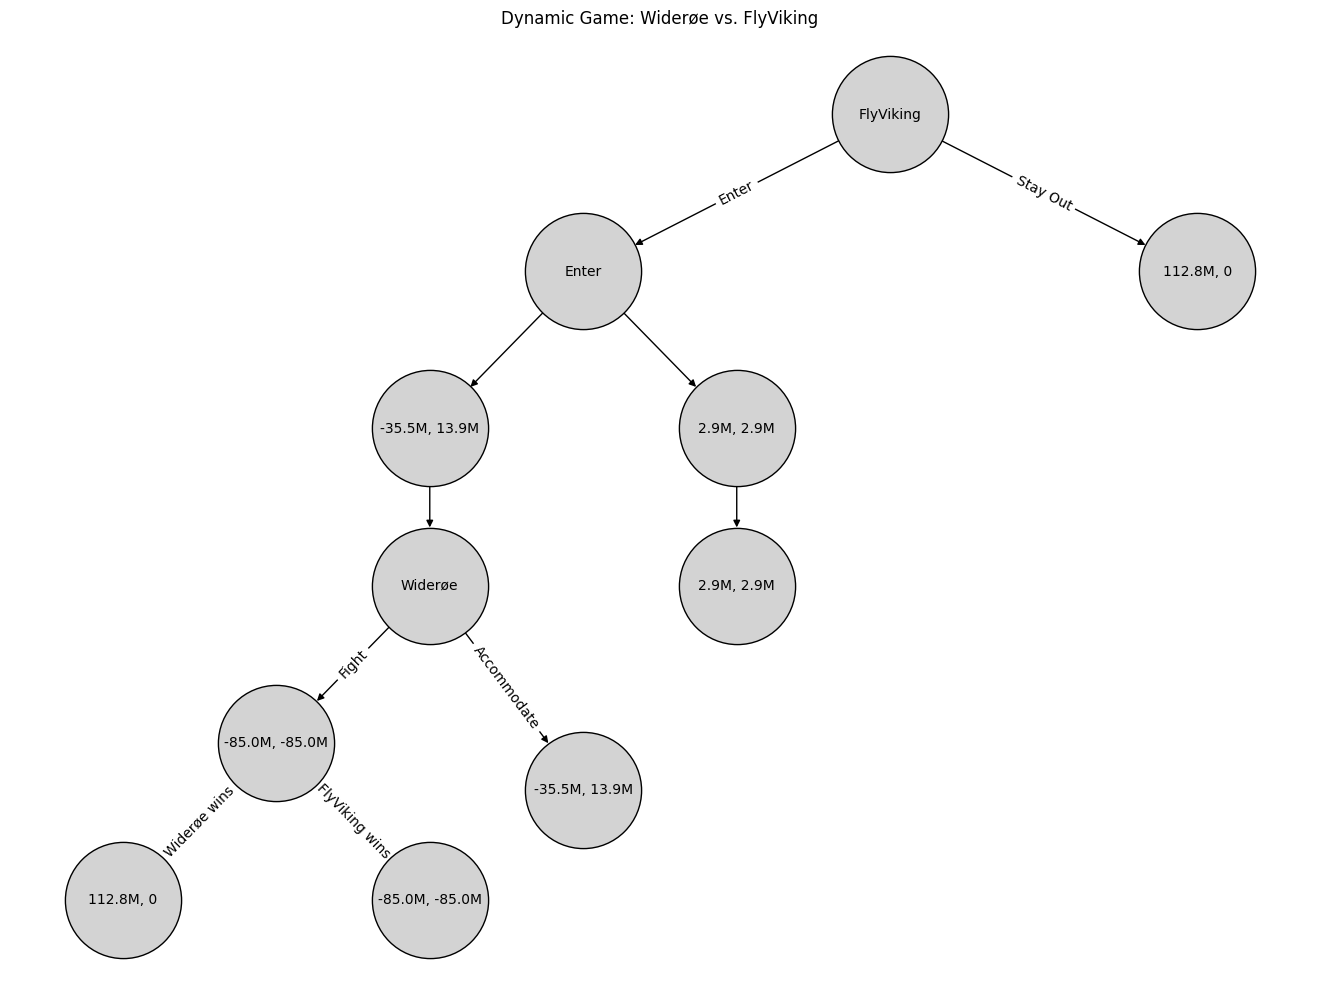

In [250]:
# Create a directed graph for the Widerøe vs. FlyViking market entry game
G = nx.DiGraph()

# Define nodes and their labels
nodes = {
    "start":       "FlyViking",
    "Enter":       "Enter",
    "Out":         f"{w_mono['Wideroe Surplus']/1e6:.1f}M, 0",
    "Cournot":     f"{w_cour['Wideroe Surplus']/1e6:.1f}M, {w_cour['FlyViking Surplus']/1e6:.1f}M",
    "Stackelberg": f"{w_stack['Wideroe Surplus']/1e6:.1f}M, {w_stack['FlyViking Surplus']/1e6:.1f}M",
    "Wideroe":     "Widerøe",
    "Fight":       f"{w_aggr['Wideroe Surplus']/1e6:.1f}M, {w_aggr['FlyViking Surplus']/1e6:.1f}M",
    "Accommodate": f"{w_stack['Wideroe Surplus']/1e6:.1f}M, {w_stack['FlyViking Surplus']/1e6:.1f}M",
    "Win":         f"{w_mono['Wideroe Surplus']/1e6:.1f}M, 0",
    "Lose":        f"{w_aggr['Wideroe Surplus']/1e6:.1f}M, {w_aggr['FlyViking Surplus']/1e6:.1f}M",
    "Nash":        f"{w_cour['Wideroe Surplus']/1e6:.1f}M, {w_cour['FlyViking Surplus']/1e6:.1f}M"
}

# Define edges: (from, to)
edges = [
    ("start",    "Enter"),
    ("start",    "Out"),
    ("Enter",    "Stackelberg"),
    ("Enter",    "Cournot"),
    ("Cournot",  "Nash"),
    ("Stackelberg","Wideroe"),
    ("Wideroe",  "Fight"),
    ("Wideroe",  "Accommodate"),
    ("Fight",    "Win"),
    ("Fight",    "Lose"),
]


# Add edges to graph
G.add_edges_from(edges)

# Define positions for layout
pos = {
    "start":       (0, 5),
    "Enter":       (-2, 4),
    "Out":         ( 2, 4),
    "Stackelberg": (-3, 3),
    "Cournot":     (-1, 3),
    "Nash":        (-1, 2),
    "Wideroe":     (-3, 2),
    "Fight":       (-4, 1),
    "Win":         (-5, 0),
    "Lose":        (-3, 0),
    "Accommodate": (-2, 0.7),
}

# Draw the graph
plt.figure(figsize=(13,9.5))

nx.draw(G, pos, with_labels=False, arrows=True,
        node_size=7000, node_color='lightgray', edgecolors='black')
nx.draw_networkx_labels(G, pos, labels=nodes, font_size=10)


nx.draw_networkx_edge_labels(G, pos, edge_labels={
    ("start","Enter"):     "Enter",
    ("start","Out"):       "Stay Out",
    ("Wideroe","Fight"):   "Fight",
    ("Wideroe","Accommodate"): "Accommodate",
    ("Fight","Win"):       "Widerøe wins",
    ("Fight","Lose"):      "FlyViking wins",
}, font_color='black')

plt.title("Dynamic Game: Widerøe vs. FlyViking")
plt.axis('off')
plt.show()

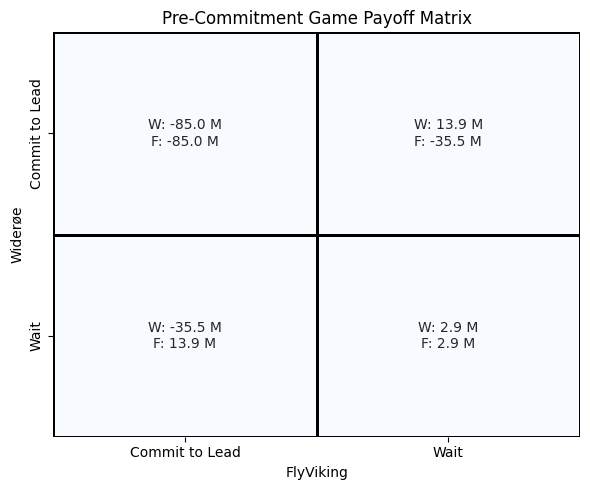

In [251]:
# Recompute the key q’s from the helpers
q_leader, q_follower = stackelberg_equilibrium(a, b, marginal_cost)
q_cour               = (a - marginal_cost) / (3*b)

# Recompute all the relevant π’s
pi_fight        = firm_profit(q_leader,  q_leader,   marginal_cost, F_duopoly, 2)
pi_W_leads      = firm_profit(q_leader,  q_follower, marginal_cost, F_duopoly, 2)
pi_F_follows    = firm_profit(q_follower,q_leader,   marginal_cost, F_duopoly, 2)
# In this symmetric setup the “leader” payoff is the same no matter who leads:
pi_F_leads      = pi_W_leads
pi_W_follows    = pi_F_follows
pi_both_cournot = firm_profit(q_cour,    q_cour,     marginal_cost, F_duopoly, 2)

# Build the strategy/payoff table
strategies  = ['Commit to Lead','Wait']
payoff_data = {
    ('Commit to Lead','Commit to Lead'): (pi_fight,      pi_fight),
    ('Commit to Lead','Wait'):           (pi_W_leads,    pi_F_follows),
    ('Wait','Commit to Lead'):           (pi_W_follows,  pi_F_leads),
    ('Wait','Wait'):                     (pi_both_cournot, pi_both_cournot),
}

# Turn into a DataFrame of annotated strings
table = pd.DataFrame(index=strategies, columns=strategies)
for (w_s,f_s), (π_w,π_f) in payoff_data.items():
    table.loc[w_s, f_s] = f"W: {π_w/1e6:.1f} M\nF: {π_f/1e6:.1f} M"

# And finally plot it
plt.figure(figsize=(6,5))
sns.heatmap(
    np.zeros((2,2)),        # dummy data
    annot=table.values,
    fmt="",
    cmap="Blues",
    cbar=False,
    xticklabels=strategies,
    yticklabels=strategies,
    linewidths=1,
    linecolor="black"
)
plt.title("Pre‑Commitment Game Payoff Matrix")
plt.xlabel("FlyViking")
plt.ylabel("Widerøe")
plt.tight_layout()
plt.show()

The transition from monopoly to duopoly and eventually to oligopoly leads to significant changes in consumer surplus and producer surplus. In Widerøe’s monopoly, as seen in Figure, high prices and limited output created low consumer surplus and a large producer surplus, resulting in notable deadweight loss. When FlyViking entered the market, output increased and prices decreased, leading to gains in consumer surplus and improvements in total welfare.
As more firms enter the market, consumer surplus increases, while producer surplus declines sharply. The chart shows that in scenarios with more competitors, producer surplus turns negative. These outcomes reflect the challenges of maintaining profitability in a market with high fixed costs and limited demand. Although total welfare initially grows, the later scenarios suggest that the benefits to consumers are outweighed by the producer loss, making the overall market less stable.
The Stackelberg model highlights how dominant firms like Widerøe can respond to new entrants with aggressive strategies that protect their market position. By increasing output beyond profit-maximising levels, a firm can force potential rivals into unsustainable positions. These actions increase uncertainty and discourage further entry, even when consumer benefits are present.
Perfect competition is often viewed as the most efficient outcome in theory, but the results presented here show that this does not hold in practice for regional aviation. The market structure is characterised by high entry barriers, large fixed costs, and a limited demand, which makes sustaining multiple firms difficult.
This pattern aligns with the concept of a natural monopoly, where one firm can most efficiently serve the entire market. In this case, both the extended Cournot model and the welfare data point toward the conclusion that regional aviation in Northern Norway is a natural monopoly or a stable duopoly.    